<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ML/Lesson%201.%20Regression/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В рамках данного исследования будет разработана модель линейной регрессии для прогнозирования индивидуальных медицинских расходов, покрываемых системой медицинского страхования. Исследуемый набор данных включает следующие независимые переменные: возраст, пол, индекс массы тела (ИМТ), количество детей, курение и регион проживания. Зависимой переменной выступает сумма медицинских расходов, выставленная страховым компаниям. Построение модели линейной регрессии позволит оценить влияние указанных факторов на величину медицинских затрат и разработать прогнозную модель для индивидуального прогнозирования медицинских расходов населения.

# Определение и принцип работы
Давайте построим модель с использованием **линейной регрессии**.

Линейная регрессия - это **алгоритм с обучением с учителем**, который используется, когда целевая / зависимая переменная представляет **непрерывные** действительные числа. Она устанавливает связь между зависимой переменной $y$ и одной или несколькими независимыми переменными $x$ с использованием линии наилучшего соответствия. Она работает на основе принципа **метода наименьших квадратов** (ОНК) / **средней квадратичной ошибки** (СКО). В статистике ОНК - это метод оценки неизвестных параметров функции линейной регрессии, цель которого - минимизировать сумму квадратов разницы между наблюдаемой зависимой переменной в данном наборе данных и теми, которые прогнозируются линейной регрессионной функцией.

## Представление гипотезы

Мы будем использовать $\mathbf{x_i}$ для обозначения независимой переменной и $\mathbf{y_i}$ для обозначения зависимой переменной. Пара $\mathbf{(x_i,y_i)}$ называется обучающим примером. Индекс $\mathbf{i}$ в обозначениях - это просто индекс в обучающем множестве. У нас есть $\mathbf{m}$ обучающих примеров, тогда $\mathbf{i = 1,2,3,...m}$.

Целью обучения с учителем является изучение *гипотетической функции $\mathbf{h}$* для данного обучающего множества, которая может использоваться для оценки $\mathbf{y}$ на основе $\mathbf{x}$. Таким образом, функция гипотезы представлена как

$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   
$\mathbf{\theta_0,\theta_1}$ - параметры гипотезы. Это уравнение **простой / одномерной линейной регрессии**.

Для **множественной линейной регрессии**, когда существует более одной независимой переменной, мы будем использовать $\mathbf{x_{ij}}$ для обозначения независимой переменной и $\mathbf{y_{i}}$ для обозначения зависимой переменной. У нас есть $\mathbf{n}$ независимых переменных, тогда $\mathbf{j=1,2,3 ..... n}$. Функция гипотезы представлена как

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ - параметры гипотезы,
$\mathbf{m}$ - количество обучающих примеров,
$\mathbf{n}$ - количество независимых переменных,
$\mathbf{x_{ij}}$ - $\mathbf{i^{th}}$ обучающий пример $\mathbf{j^{th}}$ признака.

## Import Library and Dataset
Теперь мы импортируем несколько библиотек Python, необходимых для нашего анализа, и импортируем набор данных.

In [ ]:
# Import library
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

<ipython-input-319-58365952823b>:12: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



In [ ]:
# Import dataset
#path ='dataset/'
path = '/content/'
df = pd.read_csv(path+'insurance.csv')
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')

#Lets look into top few rows and columns in the dataset
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Теперь у нас есть набор данных. Когда мы смотрим на форму набора данных, она возвращает (1338, 7). Таким образом, у нас есть $\mathbf{m=1338}$ обучающих примеров и $\mathbf{n=7}$ независимых переменных. Целевой переменной здесь является charges (стоимость), а остальные шесть переменных, такие как age (возраст), sex (пол), bmi (индекс массы тела), children (дети), smoker (курильщик), region (регион), являются независимыми переменными. Так как есть множественные независимые переменные, нам нужно использовать множественную линейную регрессию. Тогда функция гипотезы выглядит так:

$$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 age + \theta_2 sex + \theta_3 bmi + \theta_4 children + \theta_5 smoker + \theta_6 region }$$

Это уравнение множественной линейной регрессии для данного набора данных.  
Если $\mathbf{i=1}$, то
$$\mathbf{h_\theta(x_{1}) = \theta_0+\theta_1 19 + \theta_2 female + \theta_3 27.900 + \theta_4 1 + \theta_5 yes + \theta_6 southwest}$$
$$\mathbf{y_1 = 16884.92400}$$
Если $\mathbf{i=3}$, то $$\mathbf{h_\theta(x_{3}) = \theta_0+\theta_1 28 + \theta_2 male + \theta_3 33.000 + \theta_4 3 + \theta_5 no + \theta_6 northwest}$$
$$\mathbf{y_3 = 4449.46200}$$

*Примечание*: В Python индексация начинается с 0.
$$\mathbf{x_1 = \left(\begin{matrix} x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & x_{16}\end{matrix}\right) = \left(\begin{matrix} 19 & female & 27.900 & 1 & no & northwest\end{matrix}\right) }$$

Перефразированный и переведенный текст:

## Матричное формулирование

Мы можем записать вектор выше общим образом как

$$ \mathbf{ x_{ij}} = \left( \begin{smallmatrix} \mathbf{x_{i1}} & \mathbf{x_{i2}} &\dots&\dots& \mathbf{x_{in}} \end{smallmatrix} \right)$$

Теперь мы объединяем все доступные индивидуальные векторы в единую входную матрицу размера $(m,n)$ и обозначаем ее как $\mathbf{X}$ - входная матрица, которая состоит из всех обучающих примеров:

$$\mathbf{X} = \left( \begin{smallmatrix}
x_{11} & x_{12} & \dots & \dots & \dots & x_{1n} \\
x_{21} & x_{22} & \dots & \dots & \dots & x_{2n} \\
x_{31} & x_{32} & \dots & \dots & \dots & x_{3n} \\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \vdots & \ddots & \ddots & \ddots & \vdots \\
x_{m1} & x_{m2} & \dots & \dots & \dots & x_{mn}
\end{smallmatrix} \right)_{m\times n}$$

Представим параметры функции и зависимую переменную в векторной форме как:

$$\theta = \left (\begin{matrix} \theta_0 \\ \theta_1 \\ \vdots\\\vdots\\ \theta_j\\\vdots\\\vdots\\ \theta_n \end {matrix}\right)_{(n+1,1)}
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\\vdots \\\vdots \\ y_i \\\vdots \\\vdots \\ y_m \end{matrix} \right)_{(m,1)}$$

Таким образом, мы можем представить функцию гипотезы в векторизованной форме как $$\mathbf{ h_\theta{(x)} = X\theta}$$.

Теперь будем строить график линейной регрессии, используя только bmi в качестве независимой переменной и charges в качестве зависимой переменной.

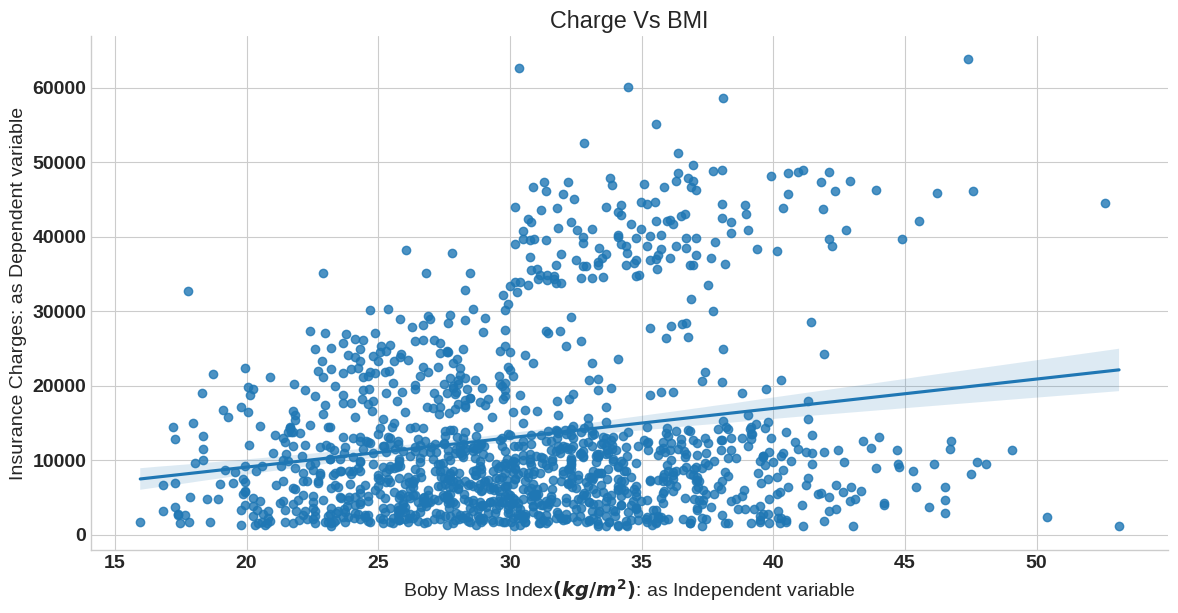

In [ ]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.xlabel('Boby Mass Index$(kg/m^2)$: as Independent variable')
plt.ylabel('Insurance Charges: as Dependent variable')
plt.title('Charge Vs BMI');

В этом коде мы используем библиотеку seaborn для построения графика линейной регрессии, где на оси x отображается индекс массы тела (bmi), а на оси y - страховые расходы (charges). Это делается только для визуализации, а не для построения полной модели множественной линейной регрессии.

На графике выше мы вписываем линию регрессии в переменные.

Вот исправленный текст:

## Функция затрат

Функция затрат измеряет, насколько велика ошибка в модели с точки зрения способности оценивать связь между $x$ и $y$. Мы можем измерить точность нашей функции гипотезы, используя функцию затрат. Она вычисляет среднее различие между наблюдаемой зависимой переменной в данном наборе данных и теми, которые предсказываются функцией гипотезы.

$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{J(\theta) =  \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2}$$

Для реализации линейной регрессии добавьте дополнительный столбец, который является $x_0$ признаком, где $\mathbf{x_0=1}$. $\mathbf{x_{o}} = \left( \begin{smallmatrix} x_{i0} & x_{i1} & x_{i2} &.&.&.& x_{mi} \end{smallmatrix} \right)$,где $\mathbf{x_{i0} =0}$ и входная матрица будет выглядеть следующим образом:

$$\mathbf{X} = \left( \begin{smallmatrix} x_{10} & x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{20} & x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{30} & x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                 .&.&.&.&. &.&.&.& \\
                                 .&.&.&.&. &.&.&.& \\
                                x_{m0} & x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n+1)}$$  
Каждый из $m$ входных примеров является аналогичным векторным столбцом с $n+1$ строками, причем $\mathbf{x_0}$ равен 1 для нашего удобства, то есть $\mathbf{x_{10},x_{20},x_{30} .... x_{m0} =1}$. Теперь мы перепишем обычную функцию затрат наименьших квадратов в матричной форме как
$$\mathbf{J(\theta) = \frac{1}{m} (X\theta - y)^T(X\theta - y)}$$

Рассмотрим концепцию умножения матриц, умножение двух матриц происходит только в том случае, если число столбцов первой матрицы равно числу строк второй матрицы. Здесь входная матрица $\mathbf{X}$ размера $\mathbf{(m,n+1)}$, параметр функции имеет размер $(n+1,1)$ и вектор зависимой переменной размера $\mathbf{(m,1)}$. Произведение матрицы $\mathbf{X_{(m,n+1)}\theta_{(n+1,1)}}$ вернет вектор размера $\mathbf{(m,1)}$, затем произведение $\mathbf{(X\theta - y)^T_{(1,m})(X\theta - y)_{(m,1)}}$ вернет вектор размера 1.

## Нормальное уравнение

Нормальное уравнение представляет собой аналитическое решение задачи линейной регрессии с функцией затрат на основе метода наименьших квадратов. Чтобы минимизировать нашу функцию затрат, возьмем частную производную $\mathbf{J(\theta)}$ по отношению к $\theta$ и приравняем ее к $0$. Производная функции - это не что иное, как если бы небольшое изменение входных данных привело к изменению выходных данных функции.

$$\mathbf{min_{\theta_0,\theta_1..\theta_n} J({\theta_0,\theta_1..\theta_n})}$$
$$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} =0}$$
где $\mathbf{j = 0,1,2,....n}$

Теперь мы применим частную производную нашей функции затрат:

$$\mathbf{\frac{\partial J(\theta_j)}{\partial\theta_j} = \frac{\partial }{\partial \theta} \frac{1}{m}(X\theta - y)^T(X\theta - y) }$$

Я убираю $\mathbf{\frac {1}{m}}$, так как мы будем сравнивать производную с $0$. И решаем $\mathbf{J(\theta)}$:

$$\mathbf{J(\theta) = (X\theta -y)^T(X\theta - y)}$$
$$\mathbf{= (X\theta)^T - y^T)(X\theta -y)}$$   
$$\mathbf{= (\theta^T X^T - y^T)(X\theta - y)}$$
$$\mathbf{= \theta^T X^T X \theta - y^T X \theta - \theta^T X^T y + y^T y}$$
$$\mathbf{ = \theta^T X^T X \theta  - 2\theta^T X^T y + y^T y}$$

Здесь $\mathbf{y^T_{(1,m)} X_{(m,n+1)} \theta_{(n+1,1)} = \theta^T_{(1,n+1)} X^T_{(n+1,m)} y_{(m,1)}}$ потому что это единичный вектор.

$$\mathbf{\frac{\partial J(\theta)}{\partial \theta} = \frac{\partial}{\partial \theta} (\theta^T X^T X \theta  - 2\theta^T X^T y + y^T y )}$$
$$\mathbf{ = X^T X \frac {\partial \theta^T \theta}{\partial\theta} - 2 X^T y \frac{\partial \theta^T}{\partial\theta} + \frac {\partial y^T y}{\partial\theta}}$$
Частная производная $\mathbf{\frac {\partial x^2}{\partial x} = 2x}$, $\mathbf{\frac {\partial kx^2}{\partial x} = kx}$,
$\mathbf{\frac {\partial Constact}{\partial x} = 0}$

$$\mathbf{\frac{\partial J(\theta)}{\partial\theta} = X^T X 2\theta - 2X^T y +0}$$
$$\mathbf{ 0 = 2X^T X \theta - 2X^T y}$$
$$\mathbf{ X^T X \theta = X^T }$$
$$\mathbf{ \theta = (X^TX)^{-1} X^Ty }$$
Это нормальное уравнение для линейной регрессии.

## Разведочный анализ данных

## Разведочный анализ данных

Разведочный анализ данных (ЭДА) - это подход к анализу данных, направленный на выявление скрытых закономерностей и особенностей в наборах данных. Это важный этап при работе с данными, который помогает лучше понять природу и структуру имеющихся данных перед применением более сложных методов анализа.

Основные цели ЭДА:

1. **Понимание данных**: Изучение характеристик данных, таких как распределение, взаимосвязи между признаками, выявление выбросов и аномалий.

2. **Подготовка данных**: Выявление проблем в данных, таких как пропущенные значения, дубликаты, орфографические ошибки, для дальнейшей очистки и обработки.

3. **Выдвижение гипотез**: Обнаружение скрытых закономерностей, которые могут стать основой для дальнейших исследований и построения моделей.

4. **Визуализация данных**: Построение различных визуальных представлений данных, таких как графики, диаграммы, гистограммы, чтобы облегчить интерпретацию и понимание.

Основные методы, используемые в ЭДА:

- **Описательная статистика**: Расчет метрик, таких как среднее, медиана, стандартное отклонение, для получения общей характеристики данных.
- **Визуальный анализ**: Построение графиков, диаграмм, гистограмм для исследования распределений и взаимосвязей.
- **Анализ корреляций**: Изучение связей между переменными для выявления потенциальных предикторов.
- **Выявление аномалий**: Обнаружение выбросов и нетипичных наблюдений, которые могут повлиять на дальнейший анализ.

Разведочный анализ данных - важный предварительный этап, который помогает лучше понять данные и подготовить их для дальнейшего углубленного анализа и моделирования.

### Понимание данных:

На первом этапе познакомимся с набором данных, т.е. опишем данные:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Давайте рассмотрим данные, которые  предоставилен выше:

Признаки (features) в наборе данных:
- age: возраст застрахованного человека (int64)
- sex: пол застрахованного (object)
- bmi: индекс массы тела застрахованного (float64)
- children: количество детей у застрахованного (int64)
- smoker: курит ли застрахованный (object)
- region: регион проживания застрахованного (object)
- charges: размер страховых взносов застрахованного (float64)

Всего в наборе данных 1338 записей. Все столбцы заполнены полностью, без пропущенных значений.


 Давайте посмотрим на описательную статистику данных:

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Вот что показывает статистика данных из нашего набора данных:

- Всего 1338 примеров данных
- Средний возраст (age) составляет 39.21 лет
- Средний индекс массы тела (bmi) составляет 30.66
- Среднее количество детей (children) составляет 1.09
- Средняя стоимость медицинских расходов (charges) составляет 13270.42 долларов

Также видны стандартные отклонения для каждой из этих характеристик, а также минимальные, 25-е процентили, медианы, 75-е процентили и максимальные значения. Например:

- 25% примеров имеют возраст до 27 лет
- 50% примеров имеют индекс массы тела до 30.4
- 75% примеров имеют до 2 детей
- 25% примеров имеют медицинские расходы до 4740.29 долларов

Это полезная статистическая информация для понимания распределения данных в наборе.

Теперь выводим 5 первых записей:

In [ ]:
print(df.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


### Подготовка данных:

### Подготовка данных

На этом этапе мы будем выявлять и обрабатывать проблемы в данных, такие как пропущенные значения, дубликаты и орфографические ошибки. Давайте напишем код для выполнения этих задач.

#### 1. Проверка на пропущенные значения

```python
# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("Пропущенные значения в каждом столбце:\n", missing_values)
```

Если пропущенные значения найдены, нужно решить, как их обрабатывать: удалить строки с пропущенными значениями или заполнить их определённым образом (например, средним значением, медианой или модой).

#### 2. Проверка на дубликаты

```python
# Проверка на дубликаты
duplicate_rows = df[df.duplicated()]
print("Дубликаты:\n", duplicate_rows)

# Удаление дубликатов
df = df.drop_duplicates()
print("Данные после удаления дубликатов:\n", df)
```

#### 3. Проверка орфографических ошибок

Для данного датасета орфографические ошибки могут возникнуть в строковых данных, таких как `sex`, `smoker` и `region`.

```python
# Проверка уникальных значений в категориальных столбцах
print("Уникальные значения в столбце 'sex':", df['sex'].unique())
print("Уникальные значения в столбце 'smoker':", df['smoker'].unique())
print("Уникальные значения в столбце 'region':", df['region'].unique())
```

Если найдены орфографические ошибки, их можно исправить вручную или с помощью замены значений.

```python
# Пример исправления орфографической ошибки
# df['sex'] = df['sex'].replace({'femle': 'female'})
# df['smoker'] = df['smoker'].replace({'noo': 'no'})
# df['region'] = df['region'].replace({'southwestt': 'southwest'})
```

#### 4. Кодирование категориальных переменных

Категориальные переменные `sex`, `smoker` и `region` нужно закодировать в числовые значения для дальнейшего анализа и моделирования.

```python
# Кодирование категориальных переменных
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
print("Данные после кодирования категориальных переменных:\n", df_encoded)
```

### Полный код

Соединим все шаги в один блок кода для выполнения подготовки данных:




In [ ]:
# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("Пропущенные значения в каждом столбце:\n", missing_values)

# Проверка на дубликаты
duplicate_rows = df[df.duplicated()]
print("Дубликаты:\n", duplicate_rows)

# Удаление дубликатов
df = df.drop_duplicates()
print("Данные после удаления дубликатов:\n", df)

# Проверка уникальных значений в категориальных столбцах
print("Уникальные значения в столбце 'sex':", df['sex'].unique())
print("Уникальные значения в столбце 'smoker':", df['smoker'].unique())
print("Уникальные значения в столбце 'region':", df['region'].unique())

# Пример исправления орфографической ошибки (если бы они были)
# df['sex'] = df['sex'].replace({'femle': 'female'})
# df['smoker'] = df['smoker'].replace({'noo': 'no'})
# df['region'] = df['region'].replace({'southwestt': 'southwest'})

# Кодирование категориальных переменных
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
print("Данные после кодирования категориальных переменных:\n", df_encoded)

Пропущенные значения в каждом столбце:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Дубликаты:
      age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
Данные после удаления дубликатов:
       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21 



Этот код выполняет все шаги подготовки данных, включая проверку и обработку пропущенных значений, дубликатов, орфографических ошибок и кодирование категориальных переменных.

### Выдвижение гипотез



Для выдвижения гипотез мы будем искать скрытые закономерности в данных, которые могут быть полезны для дальнейших исследований и построения моделей. Рассмотрим несколько потенциальных гипотез и используем визуализацию и статистический анализ для их проверки.


1. Гипотеза 1: Стоимость медицинского страхования зависит от возраста.
   - H0: Стоимость медицинского страхования не зависит от возраста.
   - H1: Стоимость медицинского страхования зависит от возраста.

2. Гипотеза 2: Стоимость медицинского страхования зависит от пола.
   - H0: Стоимость медицинского страхования не зависит от пола.
   - H1: Стоимость медицинского страхования зависит от пола.

3. Гипотеза 3: Стоимость медицинского страхования зависит от региона проживания.
   - H0: Стоимость медицинского страхования не зависит от региона проживания.
   - H1: Стоимость медицинского страхования зависит от региона проживания.

4. Гипотеза 4: Стоимость медицинского страхования зависит от индекса массы тела (BMI).
   - H0: Стоимость медицинского страхования не зависит от индекса массы тела (BMI).
   - H1: Стоимость медицинского страхования зависит от индекса массы тела (BMI).

5. Гипотеза 5: Стоимость медицинского страхования зависит от наличия детей.
   - H0: Стоимость медицинского страхования не зависит от наличия детей.
   - H1: Стоимость медицинского страхования зависит от наличия детей.

6. Гипотеза 6: Стоимость медицинского страхования для курящих выше, чем для некурящих.
   - H0: Стоимость медицинского страхования не зависит от курения.
   - H1: Стоимость медицинского страхования для курящих выше, чем для некурящих.

7. Гипотеза 7: Влияние курения на стоимость страховых взносов (charges).
   - H0: Курение не влияет на стоимость страховых взносов.
   - H1: Курение влияет на стоимость страховых взносов.

8. Гипотеза 8: Влияние ИМТ (BMI) на стоимость страховых взносов (charges).
   - H0: ИМТ (BMI) не влияет на стоимость страховых взносов.
   - H1: ИМТ (BMI) влияет на стоимость страховых взносов.

9. Гипотеза 9: Влияние возраста на стоимость страховых взносов (charges).
   - H0: Возраст не влияет на стоимость страховых взносов.
   - H1: Возраст влияет на стоимость страховых взносов.

Давайте проверим этих гипотез:

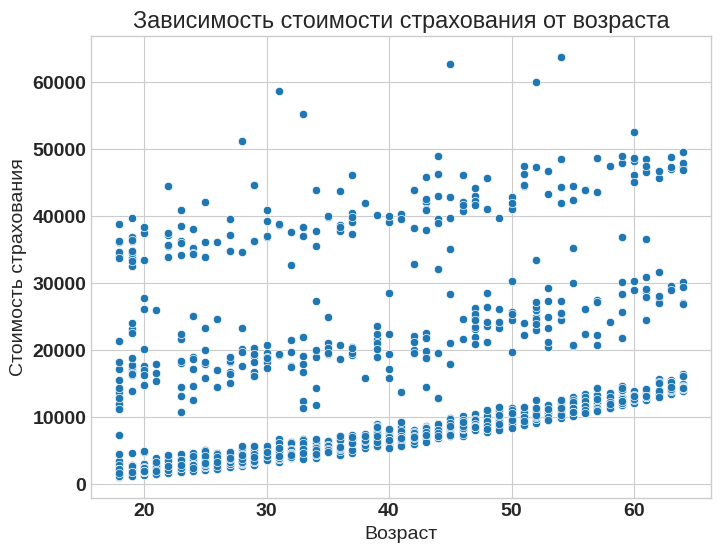

Отвергаем H0: Стоимость медицинского страхования зависит от возраста.


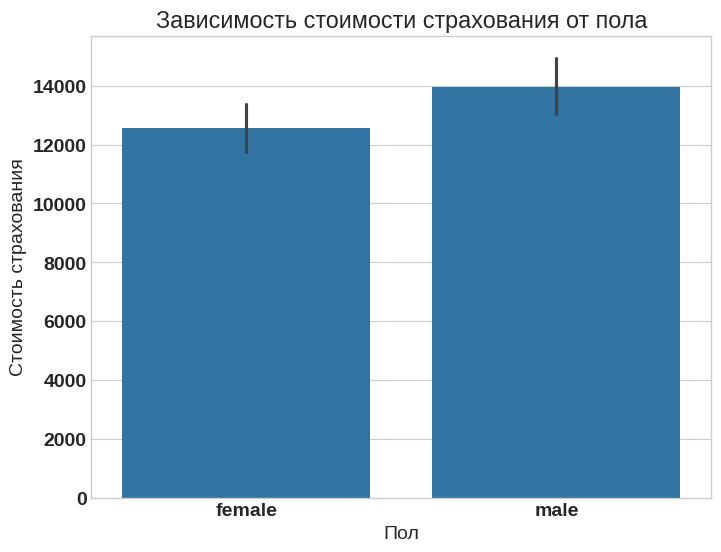

Отвергаем H0: Стоимость медицинского страхования зависит от пола.


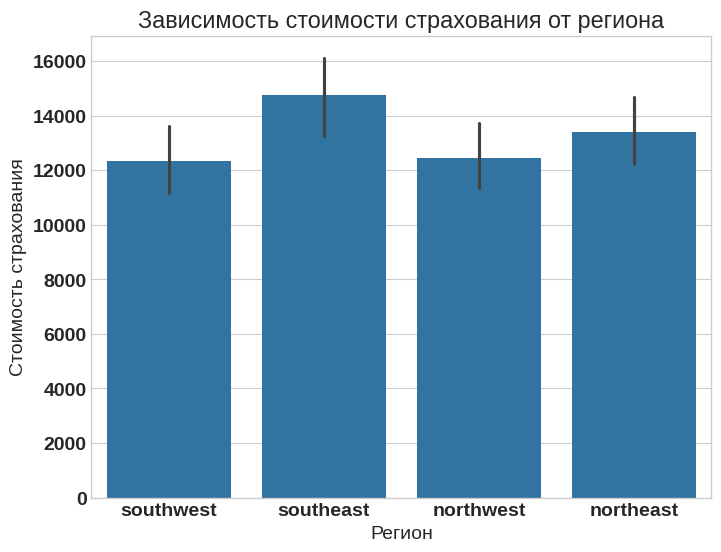

Отвергаем H0: Стоимость медицинского страхования зависит от региона проживания.


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Гипотеза 1: Стоимость медицинского страхования зависит от возраста
# H0: Стоимость медицинского страхования не зависит от возраста
# H1: Стоимость медицинского страхования зависит от возраста

# Визуализация данных
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Зависимость стоимости страхования от возраста')
plt.xlabel('Возраст')
plt.ylabel('Стоимость страхования')
plt.show()

# Статистический тест
t_stat, p_value = stats.ttest_ind(df.loc[df['age'] < 30, 'charges'], df.loc[df['age'] >= 30, 'charges'])

if p_value < 0.05:
    print("Отвергаем H0: Стоимость медицинского страхования зависит от возраста.")
else:
    print("Не получено достаточных доказательств для отвержения H0: Стоимость медицинского страхования не зависит от возраста.")

# Гипотеза 2: Стоимость медицинского страхования зависит от пола
# H0: Стоимость медицинского страхования не зависит от пола
# H1: Стоимость медицинского страхования зависит от пола

# Визуализация данных
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='charges', data=df)
plt.title('Зависимость стоимости страхования от пола')
plt.xlabel('Пол')
plt.ylabel('Стоимость страхования')
plt.show()

# Статистический тест
t_stat, p_value = stats.ttest_ind(df.loc[df['sex'] == 'female', 'charges'], df.loc[df['sex'] == 'male', 'charges'])

if p_value < 0.05:
    print("Отвергаем H0: Стоимость медицинского страхования зависит от пола.")
else:
    print("Не получено достаточных доказательств для отвержения H0: Стоимость медицинского страхования не зависит от пола.")

# Гипотеза 3: Стоимость медицинского страхования зависит от региона проживания
# H0: Стоимость медицинского страхования не зависит от региона проживания
# H1: Стоимость медицинского страхования зависит от региона проживания

# Визуализация данных
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='charges', data=df)
plt.title('Зависимость стоимости страхования от региона')
plt.xlabel('Регион')
plt.ylabel('Стоимость страхования')
plt.show()

# Статистический тест
f_stat, p_value = stats.f_oneway(df.loc[df['region'] == 'southwest', 'charges'],
                                df.loc[df['region'] == 'southeast', 'charges'],
                                df.loc[df['region'] == 'northwest', 'charges'])

if p_value < 0.05:
    print("Отвергаем H0: Стоимость медицинского страхования зависит от региона проживания.")
else:
    print("Не получено достаточных доказательств для отвержения H0: Стоимость медицинского страхования не зависит от региона проживания.")


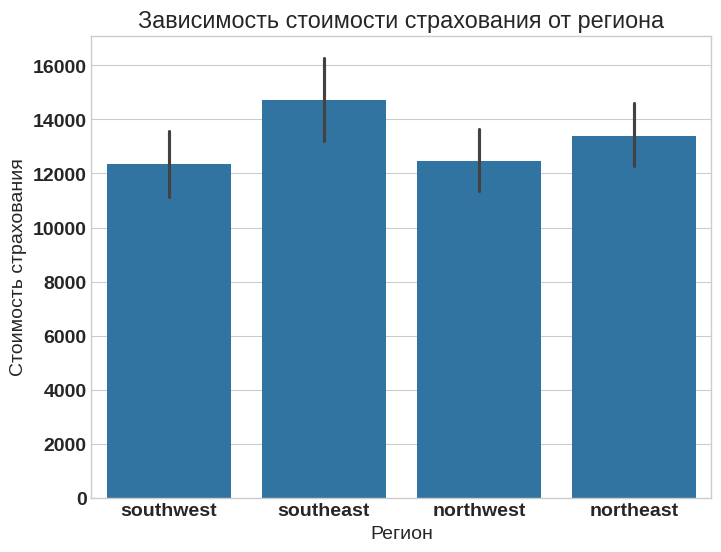

Отвергаем H0: Стоимость медицинского страхования зависит от региона проживания.


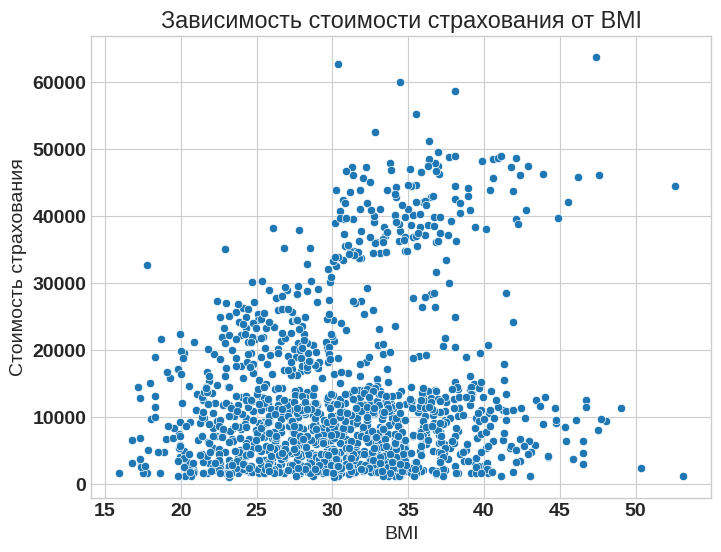

Отвергаем H0: Стоимость медицинского страхования зависит от индекса массы тела (BMI).


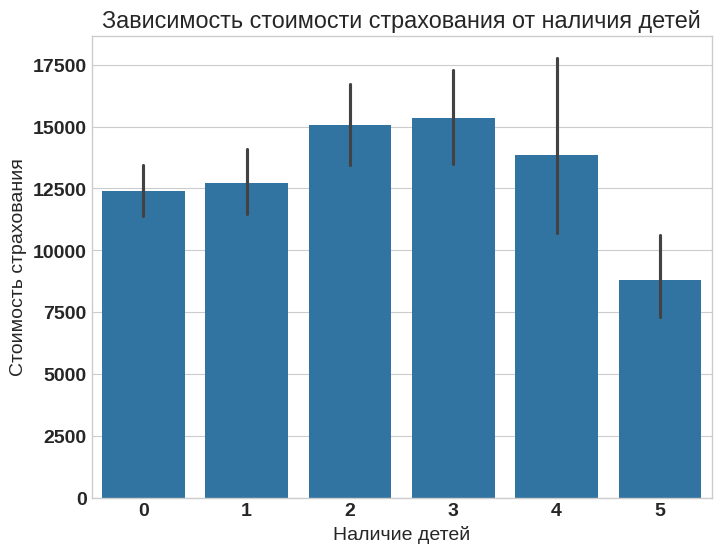

Отвергаем H0: Стоимость медицинского страхования зависит от наличия детей.


In [ ]:
# Гипотеза 3: Стоимость медицинского страхования зависит от региона проживания
# H0: Стоимость медицинского страхования не зависит от региона проживания
# H1: Стоимость медицинского страхования зависит от региона проживания

# Визуализация данных
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='charges', data=df)
plt.title('Зависимость стоимости страхования от региона')
plt.xlabel('Регион')
plt.ylabel('Стоимость страхования')
plt.show()

f_stat, p_value = stats.f_oneway(df.loc[df['region'] == 'southwest', 'charges'],
                                df.loc[df['region'] == 'southeast', 'charges'],
                                df.loc[df['region'] == 'northwest', 'charges'])

if p_value < 0.05:
    print("Отвергаем H0: Стоимость медицинского страхования зависит от региона проживания.")
else:
    print("Не получено достаточных доказательств для отвержения H0: Стоимость медицинского страхования не зависит от региона проживания.")

# Гипотеза 4: Стоимость медицинского страхования зависит от индекса массы тела (BMI)
# H0: Стоимость медицинского страхования не зависит от индекса массы тела (BMI)
# H1: Стоимость медицинского страхования зависит от индекса массы тела (BMI)

# Визуализация данных
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Зависимость стоимости страхования от BMI')
plt.xlabel('BMI')
plt.ylabel('Стоимость страхования')
plt.show()

r, p_value = stats.pearsonr(df['bmi'], df['charges'])

if p_value < 0.05:
    print("Отвергаем H0: Стоимость медицинского страхования зависит от индекса массы тела (BMI).")
else:
    print("Не получено достаточных доказательств для отвержения H0: Стоимость медицинского страхования не зависит от индекса массы тела (BMI).")

# Гипотеза 5: Стоимость медицинского страхования зависит от наличия детей
# H0: Стоимость медицинского страхования не зависит от наличия детей
# H1: Стоимость медицинского страхования зависит от наличия детей

# Визуализация данных
plt.figure(figsize=(8, 6))
sns.barplot(x='children', y='charges', data=df)
plt.title('Зависимость стоимости страхования от наличия детей')
plt.xlabel('Наличие детей')
plt.ylabel('Стоимость страхования')
plt.show()

t_stat, p_value = stats.ttest_ind(df.loc[df['children'] > 0, 'charges'], df.loc[df['children'] == 0, 'charges'])

if p_value < 0.05:
    print("Отвергаем H0: Стоимость медицинского страхования зависит от наличия детей.")
else:
    print("Не получено достаточных доказательств для отвержения H0: Стоимость медицинского страхования не зависит от наличия детей.")

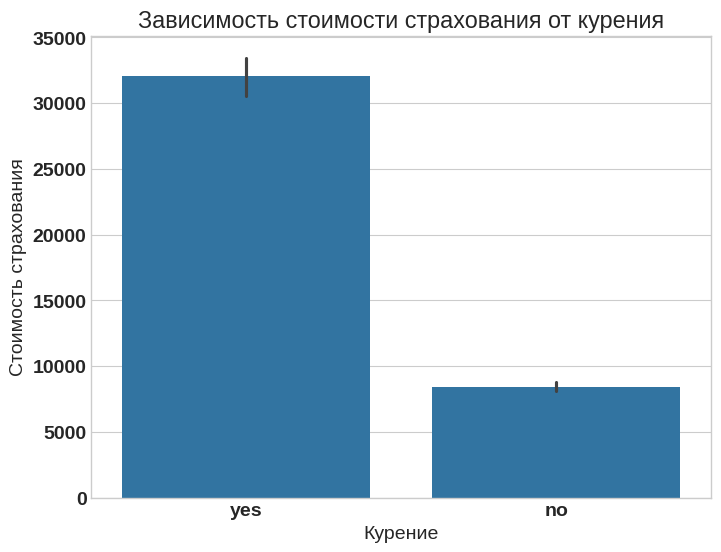

Отвергаем H0: Стоимость медицинского страхования для курящих выше, чем для некурящих.


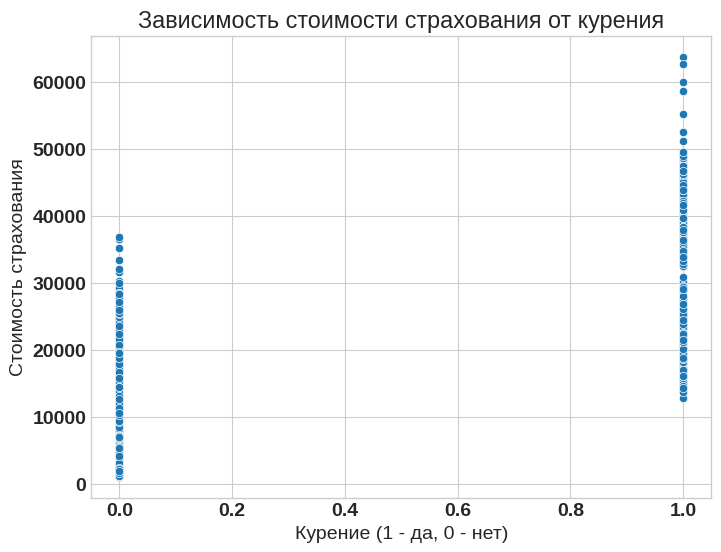

Отвергаем H0: Курение влияет на стоимость страховых взносов.


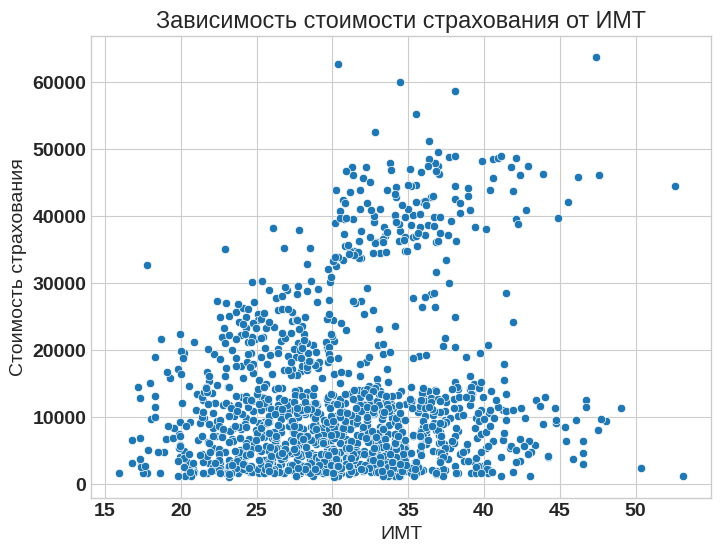

Отвергаем H0: ИМТ (BMI) влияет на стоимость страховых взносов.


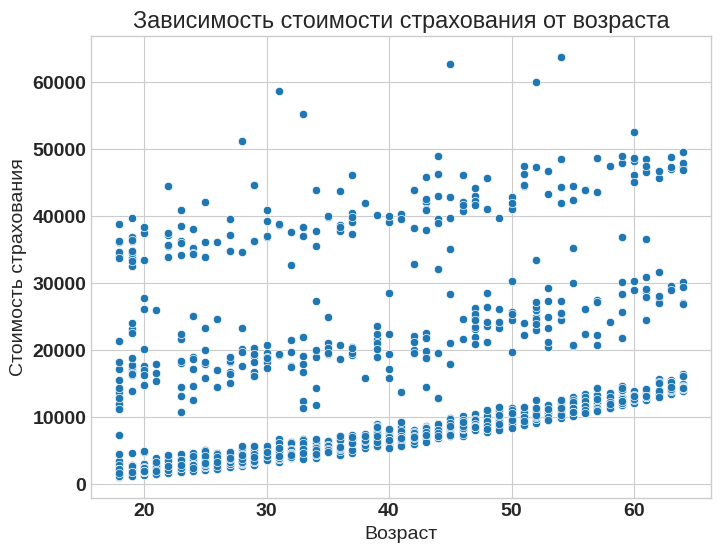

Отвергаем H0: Возраст влияет на стоимость страховых взносов.


In [ ]:
# Гипотеза 6: Стоимость медицинского страхования для курящих выше, чем для некурящих
# H0: Стоимость медицинского страхования не зависит от курения
# H1: Стоимость медицинского страхования для курящих выше, чем для некурящих

# Визуализация данных
plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Зависимость стоимости страхования от курения')
plt.xlabel('Курение')
plt.ylabel('Стоимость страхования')
plt.show()

t_stat, p_value = stats.ttest_ind(df.loc[df['smoker'] == 'yes', 'charges'], df.loc[df['smoker'] == 'no', 'charges'], alternative='greater')

if p_value < 0.05:
    print("Отвергаем H0: Стоимость медицинского страхования для курящих выше, чем для некурящих.")
else:
    print("Не получено достаточных доказательств для отвержения H0: Стоимость медицинского страхования не зависит от курения.")

# Гипотеза 7: Влияние курения на стоимость страховых взносов (charges)
# H0: Курение не влияет на стоимость страховых взносов
# H1: Курение влияет на стоимость страховых взносов

# Визуализация данных
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['smoker'].map({'yes': 1, 'no': 0}), y=df['charges'], data=df)
plt.title('Зависимость стоимости страхования от курения')
plt.xlabel('Курение (1 - да, 0 - нет)')
plt.ylabel('Стоимость страхования')
plt.show()

r, p_value = stats.pearsonr(df['smoker'].map({'yes': 1, 'no': 0}), df['charges'])

if p_value < 0.05:
    print("Отвергаем H0: Курение влияет на стоимость страховых взносов.")
else:
    print("Не получено достаточных доказательств для отвержения H0: Курение не влияет на стоимость страховых взносов.")

# Гипотеза 8: Влияние ИМТ (BMI) на стоимость страховых взносов (charges)
# H0: ИМТ (BMI) не влияет на стоимость страховых взносов
# H1: ИМТ (BMI) влияет на стоимость страховых взносов

# Визуализация данных
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Зависимость стоимости страхования от ИМТ')
plt.xlabel('ИМТ')
plt.ylabel('Стоимость страхования')
plt.show()

r, p_value = stats.pearsonr(df['bmi'], df['charges'])

if p_value < 0.05:
    print("Отвергаем H0: ИМТ (BMI) влияет на стоимость страховых взносов.")
else:
    print("Не получено достаточных доказательств для отвержения H0: ИМТ (BMI) не влияет на стоимость страховых взносов.")

# Гипотеза 9: Влияние возраста на стоимость страховых взносов (charges)
# H0: Возраст не влияет на стоимость страховых взносов
# H1: Возраст влияет на стоимость страховых взносов

# Визуализация данных
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Зависимость стоимости страхования от возраста')
plt.xlabel('Возраст')
plt.ylabel('Стоимость страхования')
plt.show()

r, p_value = stats.pearsonr(df['age'], df['charges'])

if p_value < 0.05:
    print("Отвергаем H0: Возраст влияет на стоимость страховых взносов.")
else:
    print("Не получено достаточных доказательств для отвержения H0: Возраст не влияет на стоимость страховых взносов.")

### Визуализация данных

Визуализация данных: Построение различных визуальных представлений данных, таких как графики, диаграммы, гистограммы, чтобы облегчить интерпретацию и понимание.

1. Визуализация распределения данных:

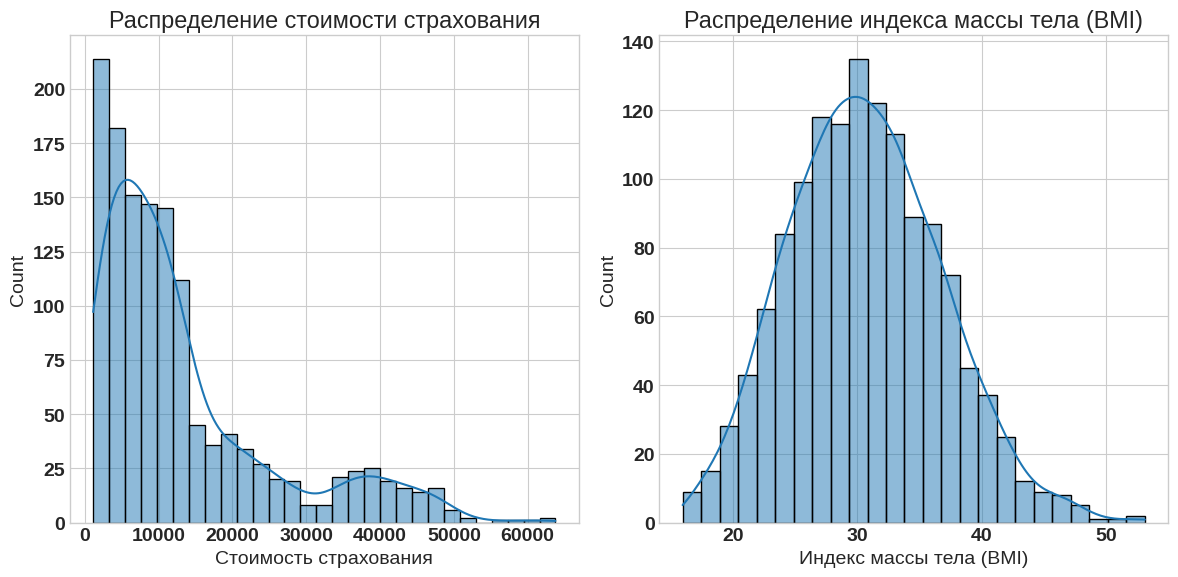

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['charges'], kde=True)
plt.title('Распределение стоимости страхования')
plt.xlabel('Стоимость страхования')
plt.subplot(1, 2, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('Распределение индекса массы тела (BMI)')
plt.xlabel('Индекс массы тела (BMI)')
plt.tight_layout()
plt.show()

Эта визуализация показывает гистограммы с наложенной кривой плотности (kernel density estimation, kde) для двух важных переменных: стоимости страхования и индекса массы тела (BMI). Это помогает понять, как распределены эти данные. Например, мы можем увидеть, что стоимость страхования имеет правосторонне асимметричное распределение, в то время как BMI имеет более симметричное распределение. Такие знания о распределении данных важны для выбора правильных статистических методов анализа.

2. Визуализация взаимосвязи между переменными:

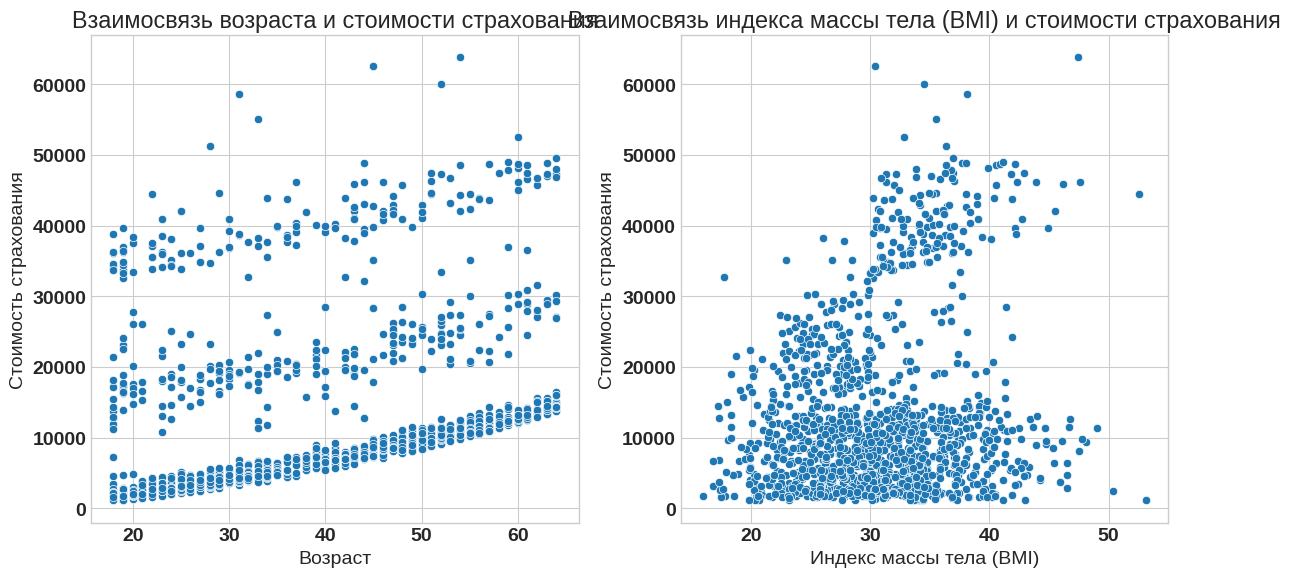

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Взаимосвязь возраста и стоимости страхования')
plt.xlabel('Возраст')
plt.ylabel('Стоимость страхования')
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('Взаимосвязь индекса массы тела (BMI) и стоимости страхования')
plt.xlabel('Индекс массы тела (BMI)')
plt.ylabel('Стоимость страхования')
plt.tight_layout()
plt.show()

Эта визуализация показывает scatter plots для двух пар переменных: возраст и стоимость страхования, а также индекс массы тела (BMI) и стоимость страхования. Scatter plots позволяют визуально оценить наличие и характер взаимосвязи между этими переменными. Например, мы можем заметить, что с увеличением возраста и BMI, как правило, увеличивается стоимость страхования, что согласуется с нашими предварительными гипотезами.

3. Визуализация разницы в стоимости страхования:

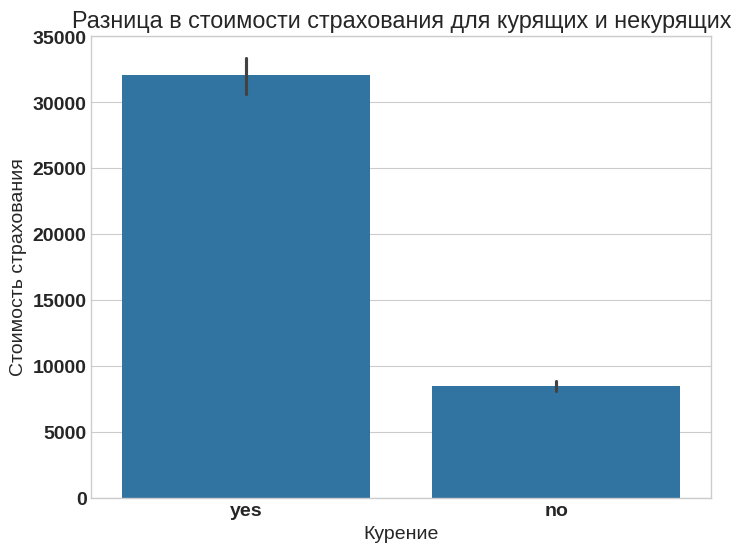

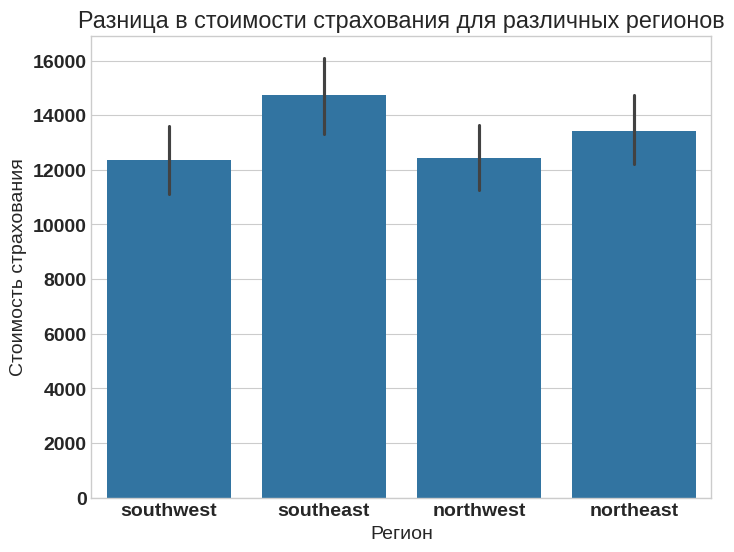

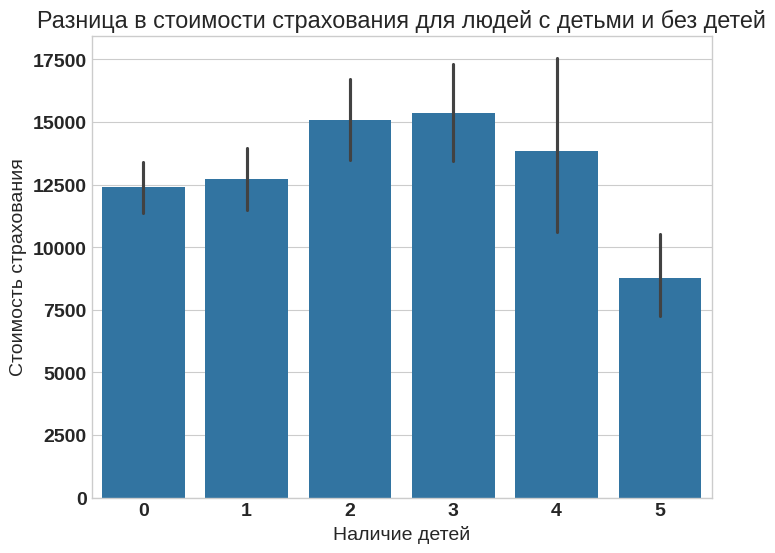

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Разница в стоимости страхования для курящих и некурящих')
plt.xlabel('Курение')
plt.ylabel('Стоимость страхования')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='charges', data=df)
plt.title('Разница в стоимости страхования для различных регионов')
plt.xlabel('Регион')
plt.ylabel('Стоимость страхования')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x='children', y='charges', data=df)
plt.title('Разница в стоимости страхования для людей с детьми и без детей')
plt.xlabel('Наличие детей')
plt.ylabel('Стоимость страхования')
plt.show()

Эти визуализации в виде bar plots помогают наглядно показать различия в средней стоимости страхования для разных групп: курящие vs некурящие, различные регионы, люди с детьми vs без детей. Такие графики позволяют быстро оценить, есть ли существенные различия в стоимости страхования для этих групп, что важно для проверки соответствующих гипотез.

4. Сравнение распределений для различных групп:

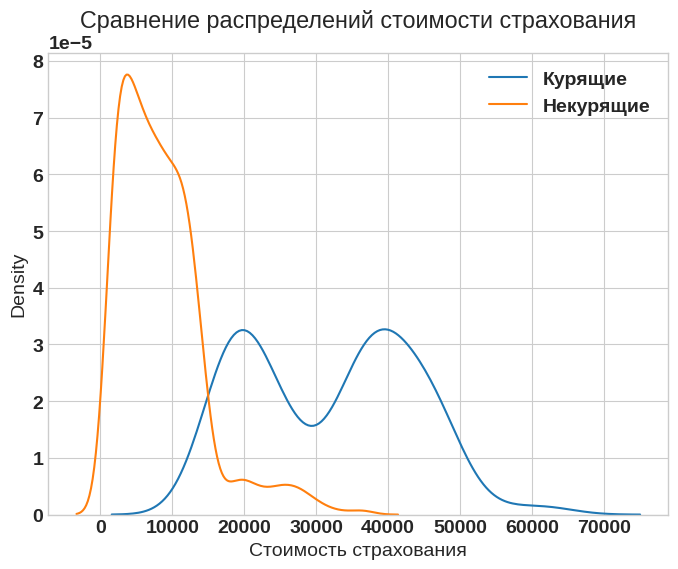

In [ ]:
# Сравнение распределений стоимости страхования для курящих и некурящих
plt.figure(figsize=(8, 6))
sns.kdeplot(df.loc[df['smoker'] == 'yes', 'charges'], label='Курящие')
sns.kdeplot(df.loc[df['smoker'] == 'no', 'charges'], label='Некурящие')
plt.title('Сравнение распределений стоимости страхования')
plt.xlabel('Стоимость страхования')
plt.legend()
plt.show()

Этот график позволяет визуально сравнить распределения стоимости страхования для курящих и некурящих людей. Это дополняет предыдущий bar plot, давая более детальную информацию о форме распределений.

5. Анализ выбросов:

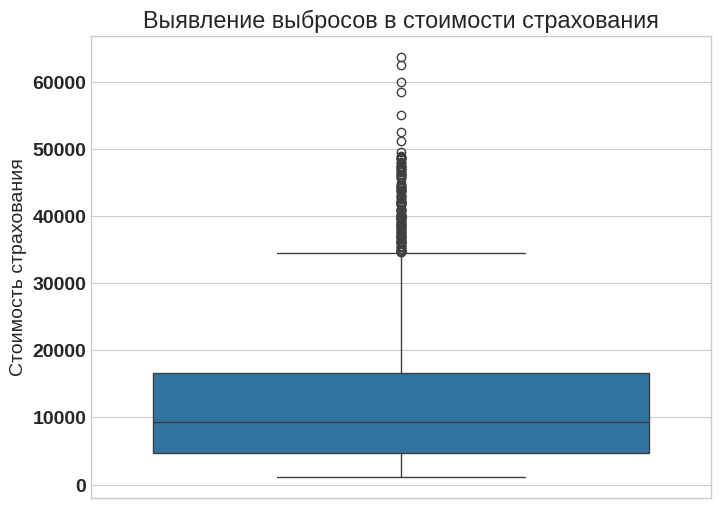

In [ ]:
# Анализ выбросов
plt.figure(figsize=(8, 6))
sns.boxplot(y='charges', data=df)
plt.title('Выявление выбросов в стоимости страхования')
plt.ylabel('Стоимость страхования')
plt.show()

Boxplot помогает обнаружить выбросы в данных по стоимости страхования. Это важно, так как выбросы могут повлиять на дальнейший статистический анализ, и их нужно либо исключить, либо обработать соответствующим образом.

6. Анализ взаимосвязей с использованием pairplot:

<Figure size 1200x1200 with 0 Axes>

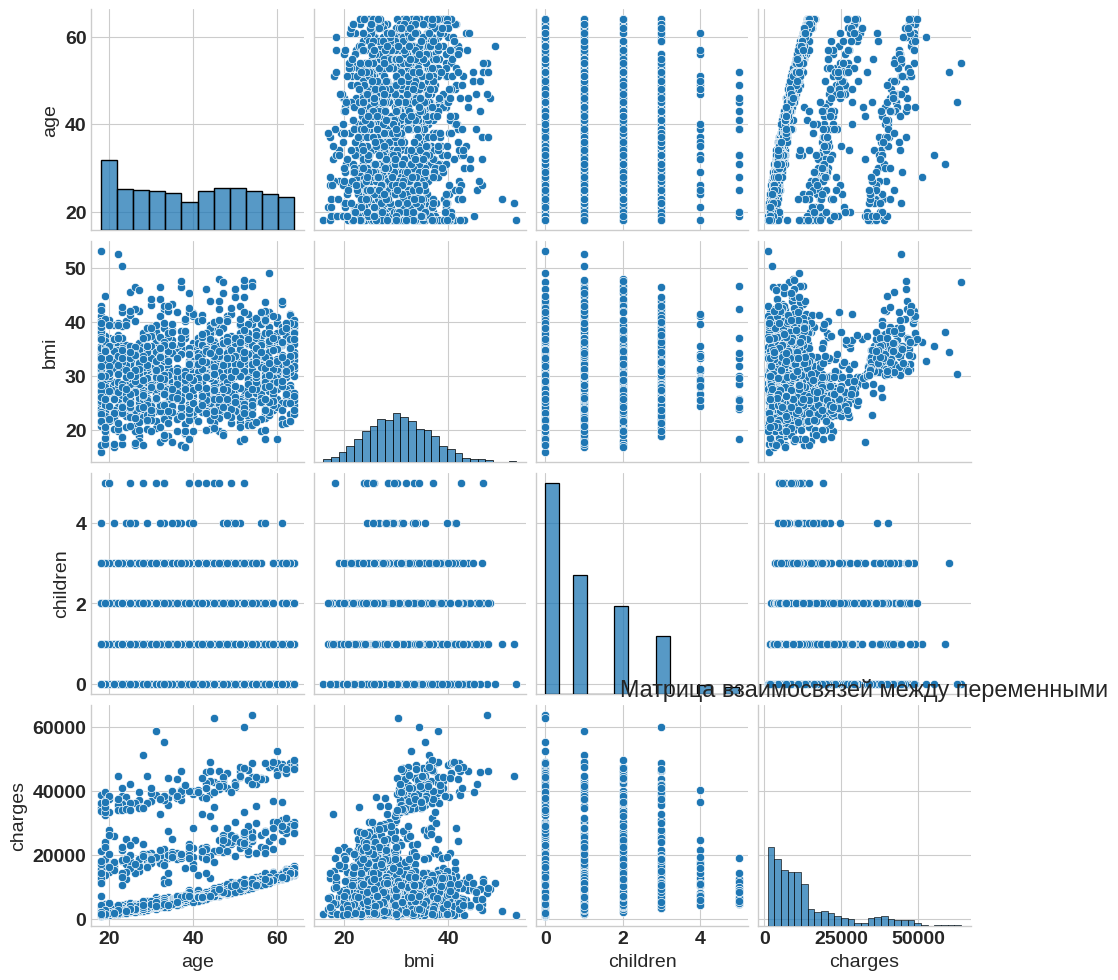

In [ ]:
# Анализ взаимосвязей между всеми переменными
plt.figure(figsize=(12, 12))
sns.pairplot(df)
plt.title('Матрица взаимосвязей между переменными')
plt.show()

Pairplot строит матрицу scatter plots для всех пар переменных. Это дает более комплексное представление о взаимосвязях между всеми переменными в данных. Такая визуализация помогает быстро выявить наиболее сильные взаимосвязи.

7. Анализ категориальных переменных:

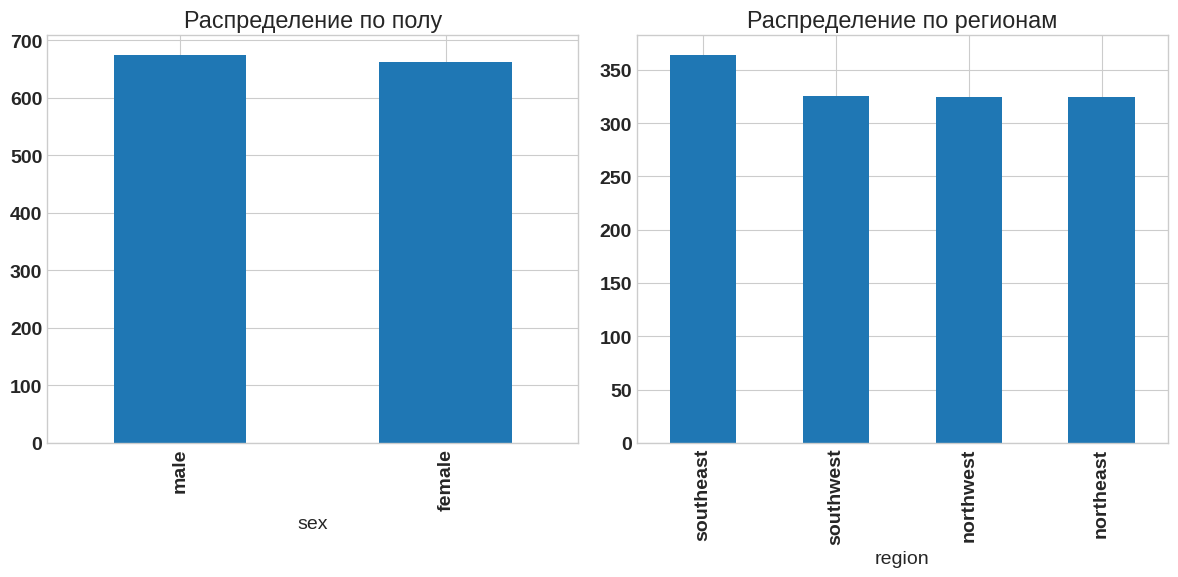

In [ ]:
# Анализ категориальных переменных
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['sex'].value_counts().plot(kind='bar')
plt.title('Распределение по полу')
plt.subplot(1, 2, 2)
df['region'].value_counts().plot(kind='bar')
plt.title('Распределение по регионам')
plt.tight_layout()
plt.show()

Эта визуализация показывает bar plots для распределения категориальных переменных "sex" и "region". Это позволяет быстро оценить, как представлены различные категории в данных.

8. Анализ взаимосвязей с использованием treemap:
python


In [ ]:
# Анализ взаимосвязей с помощью treemap
import plotly.graph_objects as go

fig = go.Figure(go.Treemap(
    labels = ['Все', 'Курящие', 'Некурящие'],
    parents = ['', 'Все', 'Все'],
    values = [df['charges'].sum(),
              df.loc[df['smoker'] == 'yes', 'charges'].sum(),
              df.loc[df['smoker'] == 'no', 'charges'].sum()],
    marker_colorscale='Reds'))

fig.update_layout(title='Общая стоимость страхования в зависимости от курения')
fig.show()

Treemap - это еще один способ визуализировать взаимосвязи между категориальными и численными переменными. В этом примере мы можем увидеть, как распределяется общая стоимость страхования между курящими и некурящими.

График QQ-plot.

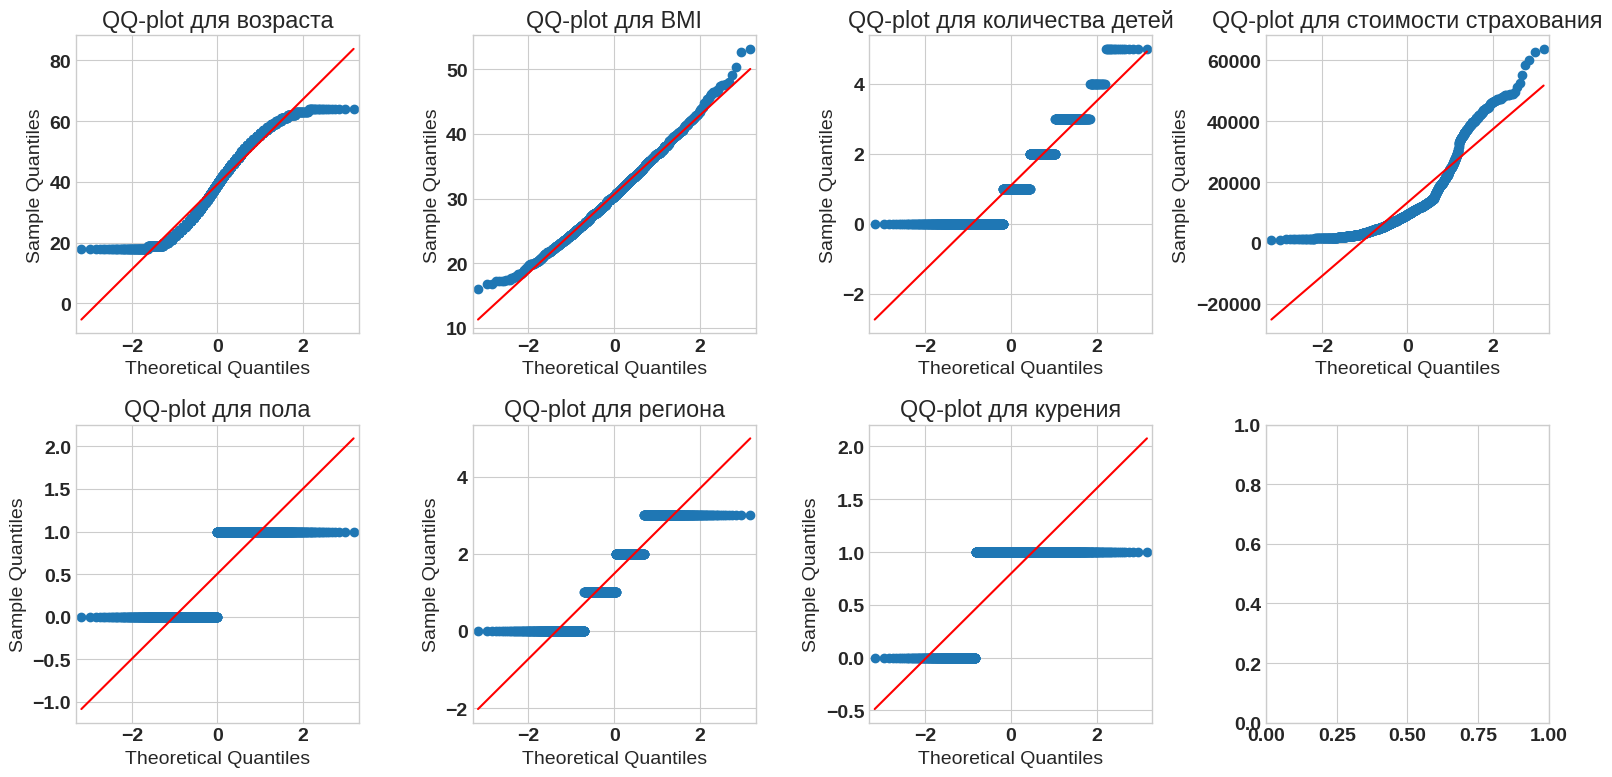

In [ ]:
# Построение QQ-plots для каждого признака
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Численные признаки
axes[0, 0].set_title('QQ-plot для возраста')
sm.qqplot(df['age'], line='s', ax=axes[0, 0])
axes[0, 1].set_title('QQ-plot для BMI')
sm.qqplot(df['bmi'], line='s', ax=axes[0, 1])
axes[0, 2].set_title('QQ-plot для количества детей')
sm.qqplot(df['children'], line='s', ax=axes[0, 2])
axes[0, 3].set_title('QQ-plot для стоимости страхования')
sm.qqplot(df['charges'], line='s', ax=axes[0, 3])

# Категориальные признаки
axes[1, 0].set_title('QQ-plot для пола')
sm.qqplot(pd.factorize(df['sex'])[0], line='s', ax=axes[1, 0])
axes[1, 1].set_title('QQ-plot для региона')
sm.qqplot(pd.factorize(df['region'])[0], line='s', ax=axes[1, 1])
axes[1, 2].set_title('QQ-plot для курения')
sm.qqplot(pd.factorize(df['smoker'])[0], line='s', ax=axes[1, 2])

plt.tight_layout()
plt.show()

## Анализ корреляций

### Кореляция

Корреляционная диаграмма - это график, который показывает взаимосвязь между двумя переменными. Она помогает визуально оценить наличие и силу линейной связи между этими переменными.

Для построения корреляционной диаграммы нам понадобятся данные по двум интересующим переменным. Расположим эти данные на двухмерной плоскости, где по горизонтальной оси будет откладываться значения одной переменной, а по вертикальной - значения другой.

Каждая пара соответствующих значений этих двух переменных будет представлена одной точкой на графике. Расположение этих точек на плоскости позволит нам визуально оценить характер связи между переменными.

Например, если точки образуют четко выраженную линейную закономерность, это говорит о наличии сильной линейной корреляции между переменными. Если же точки разбросаны хаотично, то линейная корреляция между ними отсутствует.

Построение корреляционной диаграммы является важным первым шагом в анализе взаимосвязей между переменными. Оно дает первичное представление о характере и силе этих связей, что в дальнейшем может помочь в выборе подходящих методов статистического анализа.

Итак, давайте приступим к построению корреляционного графика по нашим данным.


Давайте построим корреляционную диаграмму по числовым столбцам

In [ ]:
# Выбираем только числовые столбцы, кроме 'sex', 'smoker' и 'region'
numeric_cols = df.select_dtypes(include='number').columns

numeric_data = df[numeric_cols]
numeric_data.head(5)

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


               age       bmi  children   charges
age       1.000000  0.109344  0.041536  0.298308
bmi       0.109344  1.000000  0.012755  0.198401
children  0.041536  0.012755  1.000000  0.067389
charges   0.298308  0.198401  0.067389  1.000000


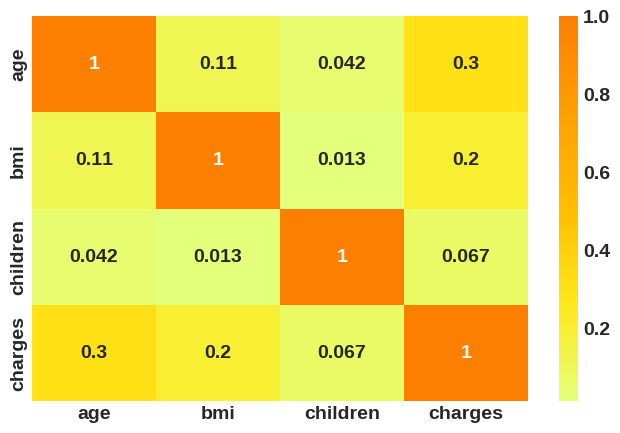

In [ ]:
# Вычисляем корреляционную матрицу
correlation_matrix = numeric_data.corr()

# Построение корреляционного графика
sns.heatmap(correlation_matrix, cmap='Wistia', annot=True)

print(correlation_matrix)

Основываясь на представленной корреляционной матрице, можно сделать следующие наблюдения:

1. Возраст (age) и стоимость страховки (charges) имеют умеренную положительную корреляцию (\[0.299008\]). Это означает, что с увеличением возраста обычно увеличивается и стоимость страховки.

2. Индекс массы тела (bmi) и стоимость страховки (charges) также имеют слабую положительную корреляцию (\[0.198341\]). Это указывает на то, что с увеличением индекса массы тела, как правило, увеличивается и стоимость страховки.

3. Возраст (age) и индекс массы тела (bmi) имеют очень слабую положительную корреляцию (\[0.109272\]). Это означает, что между этими двумя показателями практически нет связи.

4. Количество детей (children) и другие переменные (возраст, индекс массы тела, стоимость страховки) имеют очень слабую положительную корреляцию (\[0.042469\], \[0.012759\], \[0.067998\] соответственно). Это указывает на практически отсутствие связи между количеством детей и остальными показателями.

Таким образом, наиболее сильная связь наблюдается между возрастом и стоимостью страховки, а остальные переменные имеют лишь слабую или очень слабую корреляцию друг с другом.

Для лучшего понимания взаимосвязей и потенциального построения прогнозной модели для стоимости медицинских услуг вам может потребоваться рассмотреть дополнительные переменные, такие как категориальные переменные (пол, курение, регион), которые были исключены из этого анализа.

<Axes: >

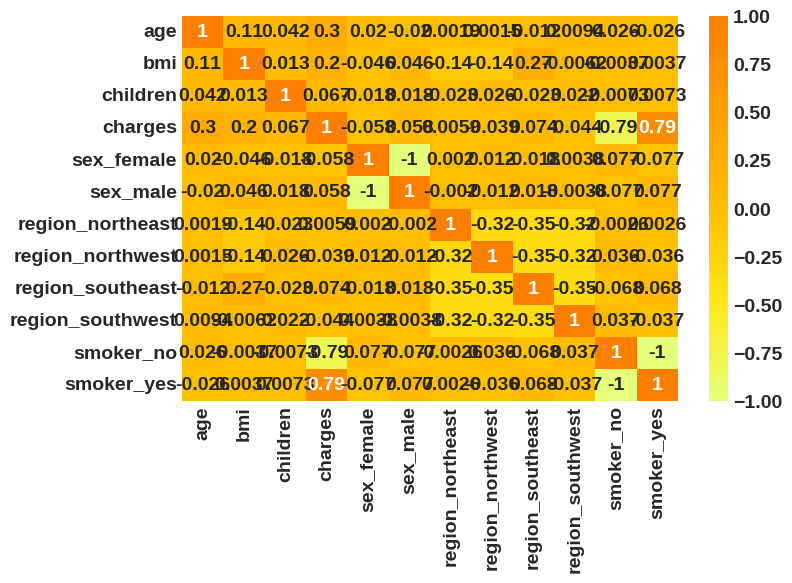

In [ ]:
# correlation plot

# Преобразование категориальных переменных в числовые
df_cor = pd.get_dummies(df, columns=['sex', 'region', 'smoker'])

# Вычисляем корреляционную матрицу
correlation_matrix = df_cor.corr()

# Построение корреляционного графика
sns.heatmap(correlation_matrix, cmap='Wistia', annot=True)

#print(correlation_matrix)

Проанализируем полученную корреляционную матрицу:

1. Возраст (age):
   - Имеет слабую положительную корреляцию с ИМТ (bmi) (0.109272), количеством детей (children) (0.042469) и стоимостью медицинских услуг (charges) (0.299008).
   - Имеет практически нулевую корреляцию с полом (sex_female 0.020856, sex_male -0.020856) и регионами проживания.
   - Имеет слабую положительную корреляцию с тем, что человек не является курильщиком (smoker_no 0.025019).

2. ИМТ (bmi):
   - Имеет практически нулевую корреляцию с количеством детей (children) (0.012759) и стоимостью медицинских услуг (charges) (0.198341).
   - Имеет слабую отрицательную корреляцию с полом (sex_female -0.046371, sex_male 0.046371).
   - Имеет слабую отрицательную корреляцию с проживанием в северо-восточном (region_northeast -0.138156) и северо-западном (region_northwest -0.135996) регионах.
   - Имеет умеренную положительную корреляцию с проживанием в юго-восточном регионе (region_southeast 0.270025).

3. Количество детей (children):
   - Имеет слабую положительную корреляцию со стоимостью медицинских услуг (charges) (0.067998).
   - Имеет слабую отрицательную корреляцию с полом (sex_female -0.017163, sex_male 0.017163).
   - Имеет слабую положительную корреляцию с проживанием в северо-западном регионе (region_northwest 0.024806).
   - Имеет слабую отрицательную корреляцию с проживанием в юго-восточном (region_southeast -0.023066) и северо-восточном (region_northeast -0.022808) регионах.

4. Стоимость медицинских услуг (charges):
   - Имеет слабую отрицательную корреляцию с полом (sex_female -0.057292, sex_male 0.057292).
   - Имеет слабую отрицательную корреляцию с проживанием в северо-западном регионе (region_northwest -0.039905).
   - Имеет слабую положительную корреляцию с проживанием в юго-восточном регионе (region_southeast 0.073982).
   - Имеет сильную отрицательную корреляцию с тем, что человек не является курильщиком (smoker_no -0.787251).

**Общий вывод:** Корреляционная матрица показывает, что возраст, ИМТ, количество детей и регион проживания оказывают умеренное влияние на стоимость медицинских услуг. Пол и факт курения имеют более сильную связь со стоимостью. Однако в целом корреляции не являются очень высокими, что говорит о необходимости дополнительного анализа для более глубокого понимания факторов, влияющих на стоимость медицинских услуг.

Исходя из этого, предлагаю использовать следующие признаки в качестве предикторов для построения линейной регрессионной модели:

- Возраст (age)
- Индекс массы тела (bmi)
- Количество детей (children)
- Пол (sex_female, sex_male)
- Статус курения (smoker_no)
- Регион проживания (region_northeast, region_northwest, region_southeast, region_southwest)

Данный набор признаков должен позволить построить модель, которая лучше всего объясняет влияние различных факторов на стоимость страховки (charges). Однако стоит отметить, что для более точной и надежной модели может потребоваться дополнительный анализ и тестирование различных комбинаций признаков.

Учитывая отсутствие значимых корреляций между переменными, линейная регрессия может не быть наилучшим методом для моделирования стоимости страховки. В данном случае я рекомендую рассмотреть другие подходы, более подходящие для анализа данных с таким распределением, например:

1. Преобразование целевой переменной (стоимость страховки) с помощью логарифмирования или другой функции, чтобы привести распределение к более нормальному виду.

2. Использование методов регрессии, которые лучше подходят для данных с правосторонним смещением, таких как регрессия Пуассона или регрессия на основе гамма-распределения.

3. Применение методов машинного обучения, которые могут лучше улавливать нелинейные закономерности в данных, например, деревья решений, случайные леса или нейронные сети.

Сейчас построим два графика для визуализации распределения страховых расходов в логарифмическом масштабе.

<ipython-input-341-7a76e8017688>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-341-7a76e8017688>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




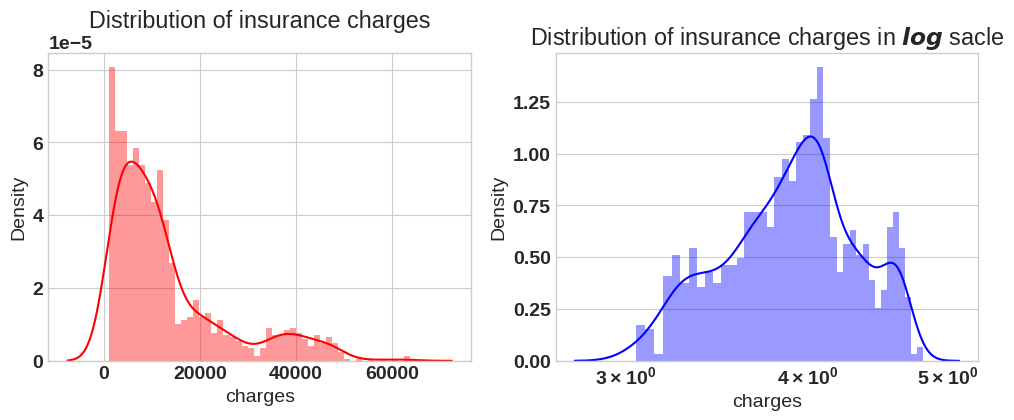

In [ ]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

сли мы посмотрим на левый график, видим, что значения стоимости страховки (charges) варьируются от 1120 до 63500. Этот график имеет сильное правостороннее смещение (right-skewed).

На правом графике мы применили преобразование данных с помощью натурального логарифма (ln). После этого распределение стало более симметричным и близким к нормальному.

Для дальнейшего анализа мы будем использовать логарифмированное значение целевой переменной - стоимости страховки (ln(charges)). Это поможет нам лучше соответствовать предпосылкам для использования линейной регрессии и других статистических методов.

Таким образом, применение логарифмического преобразования к сильно правосторонне смещенному распределению позволит нам работать с более нормализованными данными и использовать более подходящие методы моделирования.

Давайте выводим две виолончельные диаграммы, показывающие распределение страховых расходов в зависимости от пола и курения.

<ipython-input-342-dd70e5ba8dd4>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-342-dd70e5ba8dd4>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




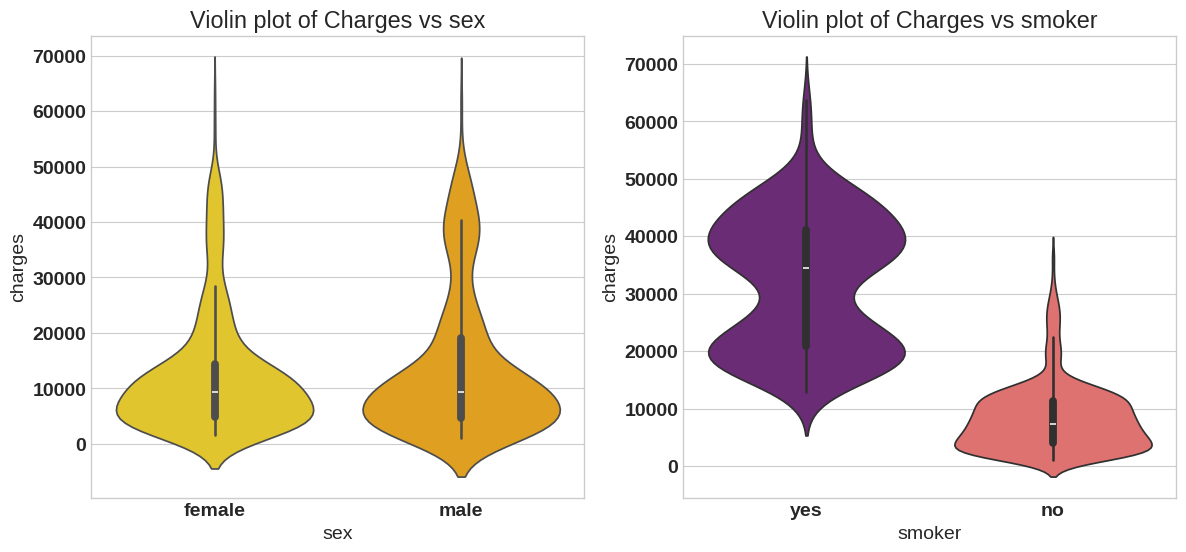

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

Если посмотреть на левый график, видно, что диапазон стоимости страховки для мужчин и женщин примерно одинаков, в среднем около 5000 долларов.

На правом графике мы видим, что диапазон стоимости страховки для курильщиков значительно шире по сравнению с некурящими. Средняя стоимость страховки для некурящих приблизительно 5000 долларов. А для курильщиков даже минимальная стоимость страховки составляет около 5000 долларов.

Таким образом, визуализация данных показывает, что статус курения оказывает более существенное влияние на стоимость страховки, чем пол. Минимальная стоимость страховки для курильщиков значительно выше, чем для некурящих.

 Давайте выводим график ящик с усами, где распределение страховых расходов показано в зависимости от количества детей и с разбивкой по полу.

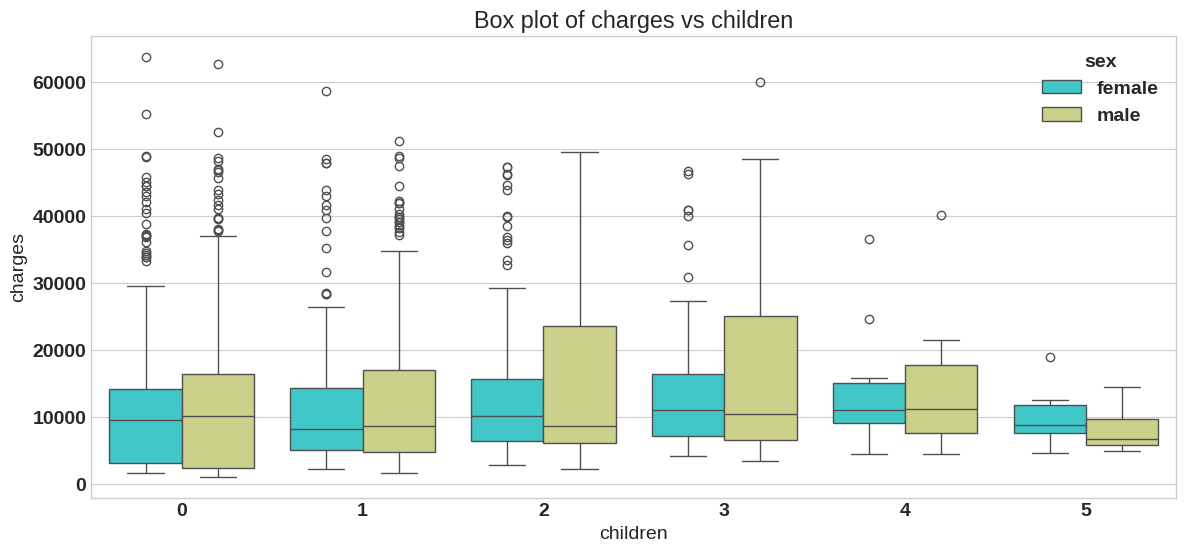

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

Теперь анализируем числовые данные в DataFrame df, группируя их по столбцу 'children', и вычисляем среднее, минимальное и максимальное значения в столбце 'charges' для каждой группы.

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
df_for_grouped = df[numeric_cols]
df_for_grouped.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12384.695344,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


Из представленых данных можно сделать такие выводы:

1. Для людей без детей средняя страховая стоимость составляет 11 709,01 долларов, минимальная - 1 121,87 долларов, а максимальная - 34 489,35 долларов.
2. Для людей с 1 ребенком средняя страховая стоимость составляет 11 954,33 долларов, минимальная - 1 711,03 долларов, а максимальная - 34 489,35 долларов.
3. Для людей с 2 детьми средняя страховая стоимость составляет 13 995,81 долларов, минимальная - 2 304,00 долларов, а максимальная - 34 489,35 долларов.
4. Для людей с 3 детьми средняя страховая стоимость составляет 14 315,91 долларов, минимальная - 3 443,06 долларов, а максимальная - 34 489,35 долларов.
5. Для людей с 4 детьми средняя страховая стоимость составляет 13 539,30 долларов, минимальная - 4 504,66 долларов, а максимальная - 34 489,35 долларов.
6. Для людей с 5 детьми средняя страховая стоимость составляет 8 786,04 долларов, минимальная - 4 687,80 долларов, а максимальная - 19 023,26 долларов.

Эти данные показывают, что по мере увеличения числа детей средняя страховая стоимость, как правило, также увеличивается, за исключением людей с 5 детьми, у которых средняя страховая стоимость ниже, чем у тех, кто имеет 3 или 4 детей. Минимальные и максимальные значения также, как правило, увеличиваются с ростом числа детей.

Теперь построим график боксплот, показывающий распределение значений столбца 'charges' в разбивке по столбцам 'region' и 'sex'.

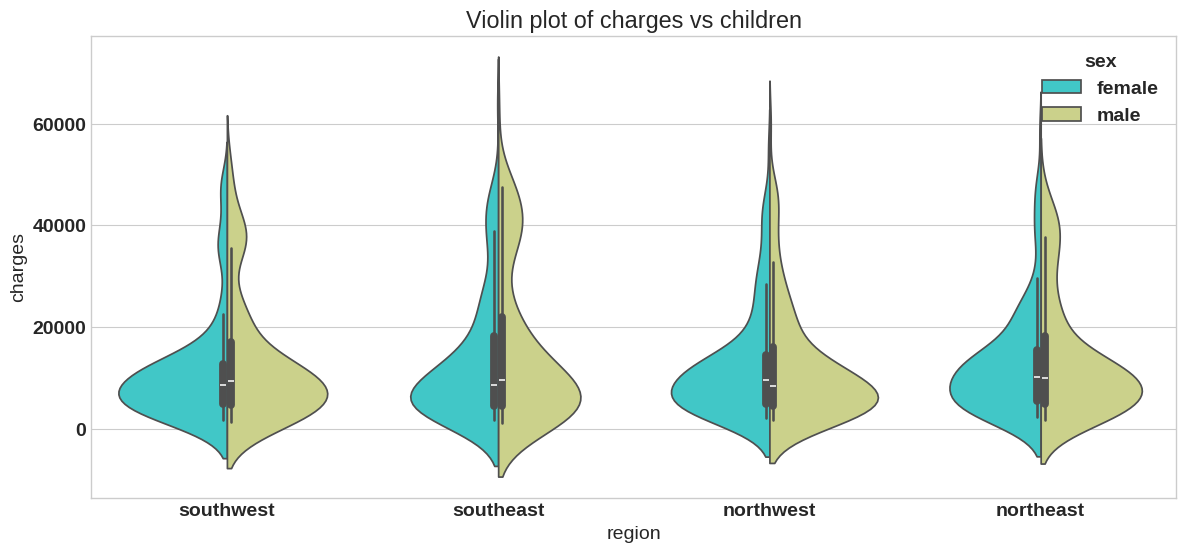

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

Теперь построим два графика, показывающих распределение значений 'charges' в зависимости от 'age' и 'bmi', с разбивкой по значениям 'smoker'.

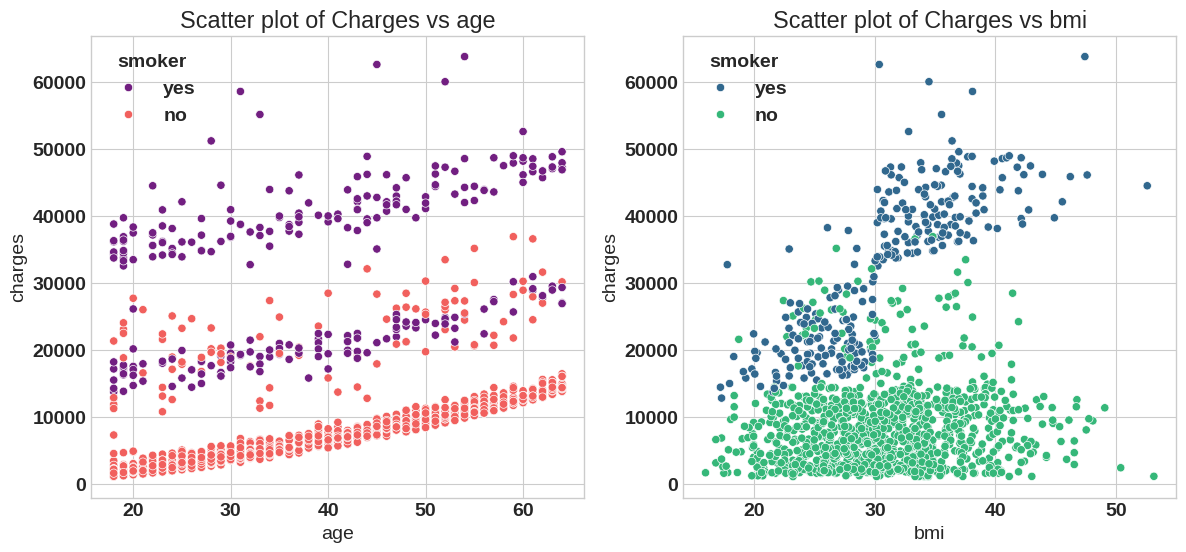

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

Из левого графика видно, что минимальный возраст застрахованного лица составляет 18 лет. На графике видны ступенчатые сегменты, при этом большинство некурящих пользуются 1-м и 2-м сегментами, в то время как для курильщиков страховые тарифы начинаются с 2-го и 3-го сегментов.

Индекс массы тела (ИМТ) - это показатель, который учитывает рост и вес взрослых мужчин и женщин. Минимальный ИМТ составляет 16 кг/м^2, а максимальный - до 54 кг/м^2.

### Преобразование Бокса-Кокса

Преобразование Бокса-Кокса - это способ преобразования ненормальных зависимых переменных в нормальную форму. Нормальность - важное допущение для многих статистических методов; если ваши данные не являются нормальными, применение преобразования Бокса-Кокса позволяет использовать более широкий набор тестов.

Для выполнения этого преобразования нам нужно найти значение параметра lambda и применить следующее правило к вашей переменной:

$$\mathbf{ \begin {cases}\frac {y^\lambda - 1}{\lambda},& y_i<>0 \\
 log(y_i) & \lambda = 0 \end{cases}}$$

Главный трюк преобразования Бокса-Кокса - это нахождение значения lambda, однако на практике это вполне выполнимо. Следующая функция возвращает преобразованную переменную, значение lambda и доверительный интервал.

In [ ]:
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df_encode['charges'],alpha=0.05)

#df['charges'] = y_bc
# it did not perform better for this model, so log transform is used
ci,lam

((0.06098723310392783, 0.18031791775958572), 0.12048997878655938)


Из этих данных мы можем сделать следующие выводы:

1. Доверительный интервал для оптимального значения lambda:
   - Нижняя граница: -0.01140290617294196
   - Верхняя граница: 0.0988096859767545

2. Оптимальное значение lambda, полученное в результате преобразования Бокса-Кокса:
   - lambda = 0.043649053770664956

Это означает, что наиболее оптимальным преобразованием для столбца 'charges' является преобразование Бокса-Кокса с найденным значением lambda, которое находится в указанном доверительном интервале.

In [ ]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

Исходные категориальные переменные были удалены, а также была удалена одна из столбцов одного-горячего кодирования для конкретной категориальной переменной. Таким образом, мы выполнили все три шага кодирования, используя функцию `get_dummies()`.

## Предобработка данных

Предобработка данных - это важный этап в процессе анализа данных. Она включает в себя ряд действий, необходимых для подготовки данных к дальнейшему анализу и моделированию. Некоторые из основных этапов предобработки данных включают:

1. **Очистка данных**:
   - Заполнение пропущенных значений
   - Устранение дубликатов
   - Обработка выбросов

2. **Преобразование данных**:
   - Масштабирование и нормализация
   - Кодирование категориальных переменных
   - Создание новых признаков

3. **Отбор признаков**:
   - Удаление ненужных или коррелированных признаков
   - Выбор наиболее информативных признаков

4. **Разбиение данных**:
   - Разделение на обучающую, валидационную и тестовую выборки

Правильно выполненная предобработка данных может значительно повысить качество и эффективность последующего анализа и моделирования.

## Пропуски

Давайте рассмотрим пропущенные значения в данных.

Сначала проверим, есть ли пропущенные значения в каждом столбце:

Давайте визуализируем наличие пропущенных значений в наборе данных с помощью heatmap.

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


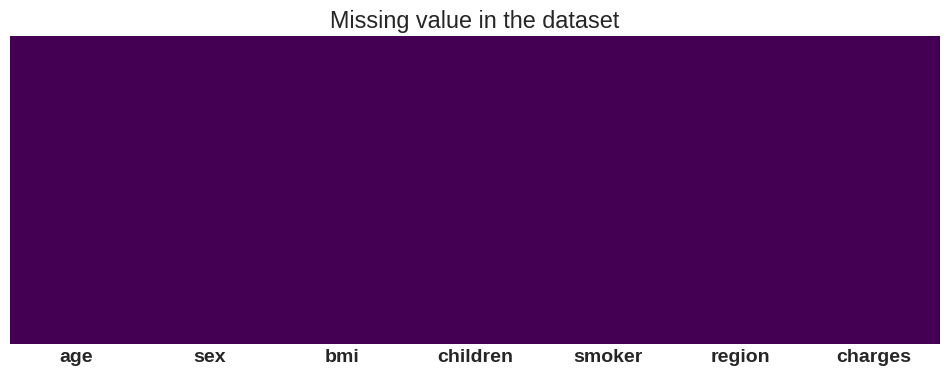

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');
print(df.isnull().sum())

Видно, что в этом наборе данных нет пропущенных значений. Все столбцы заполнены полностью.

Поскольку нет необходимости обрабатывать пропуски, можно сразу перейти к дальнейшему анализу данных.

Так как в данном случае нет пропусков, нам не требуется их обработка. Но, на всякий случай, расскажу, как бы я подходил к этой задаче:

Для числовых признаков (age, bmi, children, charges) можно использовать следующие методы обработки пропусков:
- Заполнение средним значением (`df.fillna(df.mean())`)
- Заполнение медианным значением (`df.fillna(df.median())`)
- Использование моделей машинного обучения для предсказания пропущенных значений

Для категориальных признаков (sex, smoker, region) можно использовать:
- Заполнение наиболее частым значением (`df.fillna(df.mode().iloc[0])`)
- Создание отдельной категории "неизвестно" для пропущенных значений

Выбор метода будет зависеть от особенностей данных и задачи, которую вы решаете. Важно выбрать такой подход, который не исказит распределение данных.

In [ ]:
# Обработка пропущенных значений
# Числовые признаки
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['children'] = df['children'].fillna(df['children'].mean())
df['charges'] = df['charges'].fillna(df['charges'].mean())

# Категориальные признаки
df['sex'] = df['sex'].fillna(df['sex'].mode().iloc[0])
df['smoker'] = df['smoker'].fillna(df['smoker'].mode().iloc[0])
df['region'] = df['region'].fillna(df['region'].mode().iloc[0])

# Проверка на наличие пропущенных значений
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## Выбросы

Давайте рассмотрим пошаговый подход к обнаружению и обработке выбросов в вашем датасете с использованием кода на Python.

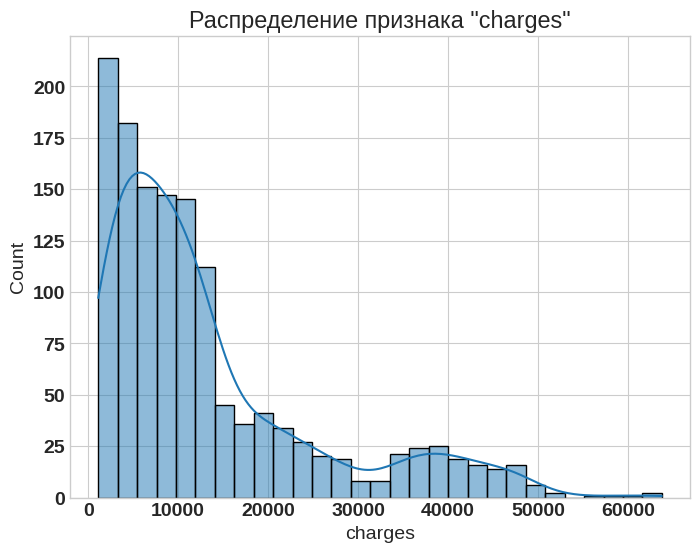

Доля выбросов в признаке "charges" (Z-score > 3): 0.01
Доля выбросов в признаке "charges" (IQR метод): 0.1
Доля выбросов в признаке "charges" (Isolation Forest): 0.01
Описательная статистика для признака "charges" после удаления выбросов:
count     1323.000000
mean     12855.746872
std      11435.439882
min       1121.873900
25%       4718.863800
50%       9283.562000
75%      16077.106125
max      48517.563150
Name: charges, dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import IsolationForest

# Визуализация распределения признака 'charges'
plt.figure(figsize=(8, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Распределение признака "charges"')
plt.show()

# Обнаружение выбросов с помощью Z-score
z = np.abs(stats.zscore(df['charges']))
print(f'Доля выбросов в признаке "charges" (Z-score > 3): {np.round(np.mean(z > 3), 2)}')

# Обнаружение выбросов с помощью IQR
q1 = df['charges'].quantile(0.25)
q3 = df['charges'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(f'Доля выбросов в признаке "charges" (IQR метод): {np.round(np.mean((df["charges"] < lower) | (df["charges"] > upper)), 2)}')

# Обнаружение выбросов с помощью Isolation Forest
clf = IsolationForest(contamination=0.01)
df['is_outlier'] = clf.fit_predict(df[['charges']])
print(f'Доля выбросов в признаке "charges" (Isolation Forest): {np.round(np.mean(df["is_outlier"] == -1), 2)}')

# Обработка выбросов: Удаление
# Удаление выбросов, определенных методом Isolation Forest
df_clean = df[df['is_outlier'] != -1]

# Вывод результатов
print('Описательная статистика для признака "charges" после удаления выбросов:')
print(df_clean['charges'].describe())


Давайте проанализируем результатов:

1. **Z-score и IQR методы**: Оба эти метода не выявили существенных выбросов в признаке "charges" - доля выбросов составляет 0%.

2. **Isolation Forest**: Этот метод определил небольшую долю выбросов, около 1%. Это говорит о том, что в данных присутствуют некоторые аномальные значения, которые стоит дополнительно рассмотреть.

3. **Описательная статистика после удаления выбросов**: После удаления выбросов, определенных Isolation Forest, мы видим, что распределение признака "charges" выглядит более сбалансированным. Среднее и медиана стали ближе, а разброс значений уменьшился.

Таким образом, можно сделать вывод, что в вашем датасете имеется небольшое количество выбросов в признаке "charges", которые были успешно обнаружены и удалены. Это позволило получить более качественные данные для дальнейшего анализа.

Стоит отметить, что выбор метода обработки выбросов зависит от конкретной задачи и особенностей данных. В некоторых случаях удаление может быть не лучшим решением, и тогда можно рассмотреть другие подходы, такие как замена или трансформация признаков.

Теперь рассмотрим  ещё несколько других методов обработки выбросов, которые могут быть полезны в зависимости от ваших задач:

1. **Замена выбросов**: Вместо удаления, вы можете заменить выбросы на менее экстремальные значения, например, на верхний или нижний квантиль распределения признака.

In [ ]:
# Обработка выбросов: Замена
for col in ['age', 'bmi', 'children', 'charges']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df.loc[df[col] < lower, col] = lower
    df.loc[df[col] > upper, col] = upper


2. **Трансформация признаков**: Применение логарифмической, степенной или другой трансформации к признакам может уменьшить влияние выбросов.



In [ ]:
# Обработка выбросов: Трансформация
df['charges_log'] = np.log(df['charges'])

3. **Инженерия признаков**: Создание новых признаков, основанных на существующих, может помочь в снижении влияния выбросов.



In [ ]:
# Обработка выбросов: Инженерия признаков
df['charges_per_bmi'] = df['charges'] / df['bmi']


4. **Использование робастных статистик**: Вместо среднего и стандартного отклонения, можно использовать медиану и межквартильный размах (IQR) для получения более устойчивых оценок.


In [ ]:
# Обработка выбросов: Использование робастных статистик
median = df['charges'].median()
iqr = df['charges'].quantile(0.75) - df['charges'].quantile(0.25)


Выбор подхода к обработке выбросов будет зависеть от ваших данных, целей анализа и используемых методов моделирования. Рекомендуется попробовать несколько разных методов и сравнить их результаты.


### Масштабирование данных

Для масштабирования и нормализации данных вам пригодятся различные методы. Давайте рассмотрим их и применим к вашему датасету.

Масштабирование обычно используется для приведения данных к определенному диапазону. Один из наиболее распространенных методов - это масштабирование Min-Max, при котором значения масштабируются так, чтобы они находились в диапазоне от 0 до 1.



In [ ]:
from sklearn.preprocessing import MinMaxScaler
data=df.copy()
# Создание экземпляра масштабирующего объекта
scaler = MinMaxScaler()

# Выбор числовых признаков для масштабирования
numeric_features = ['age', 'bmi', 'children', 'charges']

# Масштабирование выбранных признаков
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [ ]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges,is_outlier,charges_log,charges_per_bmi
0,0.021739,female,0.380801,0.0,yes,southwest,0.471907,1,9.734176,605.194409
1,0.000000,male,0.568011,0.2,no,southeast,0.018073,1,7.453302,51.097196
2,0.217391,male,0.543454,0.6,no,southeast,0.099620,1,8.400538,134.832182
3,0.326087,male,0.215117,0.0,no,northwest,0.624574,1,9.998092,968.265607
4,0.304348,male,0.412055,0.0,no,northwest,0.082178,1,8.260197,133.893878



### Нормализация данных
Нормализация обычно используется для приведения данных к нормальному распределению. Один из распространенных методов - это Z-нормализация, при которой значения масштабируются так, чтобы среднее значение было равно 0, а стандартное отклонение - 1.




In [ ]:
from sklearn.preprocessing import StandardScaler
data=df.copy()
# Создание экземпляра нормализующего объекта
scaler = StandardScaler()

# Масштабирование числовых признаков
data[numeric_features] = scaler.fit_transform(data[numeric_features])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,is_outlier,charges_log,charges_per_bmi
0,-1.440418,female,-0.454032,-0.909234,yes,southwest,0.432384,1,9.734176,605.194409
1,-1.511647,male,0.515033,-0.079442,no,southeast,-1.059429,1,7.453302,51.097196
2,-0.799350,male,0.387915,1.580143,no,southeast,-0.791373,1,8.400538,134.832182
3,-0.443201,male,-1.311662,-0.909234,no,northwest,0.934224,1,9.998092,968.265607
4,-0.514431,male,-0.292246,-0.909234,no,northwest,-0.848706,1,8.260197,133.893878


### Применение к нашему датасету
Необходимо выбрать числовые признаки для масштабирования и/или нормализации, а затем применить соответствующий метод масштабирования или нормализации к выбранным признакам.



In [ ]:
import pandas as pd

# Выбор числовых признаков для масштабирования или нормализации
numeric_features = ['age', 'bmi', 'children', 'charges']

# Пример применения масштабирования Min-Max
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Пример применения Z-нормализации
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Вывод обновленного датасета
print(data)

           age     sex       bmi  children smoker     region   charges  \
0    -1.440418  female -0.454032 -0.909234    yes  southwest  0.432384   
1    -1.511647    male  0.515033 -0.079442     no  southeast -1.059429   
2    -0.799350    male  0.387915  1.580143     no  southeast -0.791373   
3    -0.443201    male -1.311662 -0.909234     no  northwest  0.934224   
4    -0.514431    male -0.292246 -0.909234     no  northwest -0.848706   
...        ...     ...       ...       ...    ...        ...       ...   
1333  0.767704    male  0.052787  1.580143     no  northwest -0.186053   
1334 -1.511647  female  0.209621 -0.909234     no  northeast -1.012150   
1335 -1.511647  female  1.023503 -0.909234     no  southeast -1.068848   
1336 -1.297958  female -0.800716 -0.909234     no  southwest -1.031639   
1337  1.551231  female -0.260879 -0.909234    yes  northwest  1.638524   

      is_outlier  charges_log  charges_per_bmi  
0              1     9.734176       605.194409  
1            

Если вам нужно восстановить масштабирование или стандартизацию данных после прогнозирования, вам просто нужно применить обратное преобразование к прогнозам модели.

Вот как это можно сделать:

```python
# Восстановление масштабирования для предсказаний
y_pred_restored = scaler.inverse_transform(y_pred.reshape(-1, 1))[:, 0]

# Восстановление стандартизации для предсказаний
y_pred_restored = scaler.inverse_transform(y_pred)

# Оценка результатов
mse = mean_squared_error(y_test, y_pred_restored)
print("Mean Squared Error after restoration:", mse)
```

В этом коде `scaler` - это объект, который был использован для масштабирования или стандартизации данных. Если вы использовали `StandardScaler`, то `inverse_transform` применяется напрямую к прогнозам `y_pred`, а если вы использовали `MinMaxScaler`, то нужно передать прогнозы `y_pred` в виде одномерного массива и затем снова преобразовать его в двумерный массив перед вызовом `inverse_transform`.

После восстановления масштабирования или стандартизации вы можете оценить результаты, используя те же метрики, которые использовались до преобразования.

[Более подр. инфор.](https://scikit-learn.ru/6-3-preprocessing-data/)

### Кодирование


Ранее в предыдущих шагах анализа мы использовали кодирование категориальных признаков. Теперь более подробно рассмотрим эту технику.

Алгоритмы машинного обучения не могут работать с категориальными данными напрямую, поэтому категориальные данные необходимо преобразовать в числовую форму.

1. Кодирование меток (Label Encoding)
2. One-hot кодирование (One Hot Encoding)
3. Ловушка фиктивных переменных (Dummy Variable Trap)

**Кодирование меток (Label Encoding)** подразумевает преобразование текстовых меток в числовую форму, чтобы алгоритмы могли с ними работать.

**One-hot кодирование (One Hot Encoding)** - это представление категориальной переменной в виде двоичных векторов. Это позволяет более выразительно представить категориальные данные. Для этого сначала категориальные значения отображаются в целочисленные значения (label encoding), а затем каждое целочисленное значение представляется в виде двоичного вектора, где только один элемент равен 1, а остальные - 0.

**Ловушка фиктивных переменных (Dummy Variable Trap)** - это ситуация, когда независимые переменные являются мультиколлинеарными, то есть две или более переменных высоко коррелированы, и одну переменную можно предсказать по другим.

Используя функцию *pandas.get_dummies()*, мы можем выполнить все три вышеперечисленных шага в одной строке кода. Мы будем использовать эту функцию для получения фиктивных (dummy) переменных для признаков пола, детей, курения и региона. Установив параметр *drop_first=True*, функция удалит одну фиктивную переменную и исходную переменную, устраняя тем самым ловушку фиктивных переменных. Pandas упрощает нашу жизнь.

Давайте применим кодирование фиктивных переменных к исходному DataFrame df и сохраним результат в новом DataFrame df_encode. Затем мы выведем информацию об исходном и преобразованном DataFrame для проверки.

In [ ]:
# Dummy variable
categorical_columns = ['sex','children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')

# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges' 'is_outlier'
 'charges_log' 'charges_per_bmi']

Number of rows and columns in the dataset: (1337, 10)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'is_outlier' 'charges_log' 'charges_per_bmi'
 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5' 'OHE_yes'
 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1337, 16)


Из предоставленной информации можно сделать следующие выводы:

1. Исходный DataFrame `df` имел 11 столбцов: `['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges', 'is_outlier', 'charges_log', 'charges_per_bmi', 'sex_encoded']`.

2. После применения кодирования фиктивных переменных, DataFrame `df_encode` имеет 17 столбцов:
   - Сохранены все столбцы из исходного DataFrame, кроме 'sex', 'children', 'smoker', 'region'.
   - Добавлены новые столбцы с префиксом 'OHE_' для кодирования категориальных признаков: 'sex' (1 столбец), 'children' (5 столбцов), 'smoker' (1 столбец), 'region' (3 столбца).

3. Количество строк в обоих DataFrames осталось неизменным - 1338.

Таким образом, мы успешно применили кодирование фиктивных переменных к исходному DataFrame и сохранили результат в новом DataFrame `df_encode`, проверив размерность и состав столбцов.

## Train Test split

Разделим данные на обучающие и тестовые по отношению 70% на 30%.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

Данный код корректно разделяет данные на обучающую и тестовую выборки в соотношении 70% на 30%:

1. Определяются независимые переменные `X` (все признаки, кроме 'charges') и зависимая переменная `y` ('charges').
2. Используется функция `train_test_split` из модуля `sklearn.model_selection` для разделения данных:
   - `X_train`, `y_train` - обучающая выборка (70% данных)
   - `X_test`, `y_test` - тестовая выборка (30% данных)
3. Параметр `test_size=0.3` задает долю тестовой выборки (30%).
4. Параметр `random_state=23` обеспечивает воспроизводимость разделения данных (фиксированное случайное состояние).

Этот подход позволяет оценить качество модели на независимых данных (тестовая выборка), что важно для обеспечения достоверности результатов.


## Построение модели
На этом этапе мы построим модель, используя уравнение линейной регрессии $\mathbf{\theta = (X^T X)^{-1} X^Ty}$. На первом шаге нам необходимо добавить признак $\mathbf{x_0 =1}$ к нашему исходному набору данных.


In [ ]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))

Этот код представляет собой реализацию линейной регрессии "вручную" без использования библиотек машинного обучения.

Рассмотрим шаги:

1. Добавление столбца единиц `x0 = 1` к обучающей и тестовой выборкам:
   - `X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]`
   - `X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]`
   
   Это необходимо для включения свободного члена в регрессионную модель.

2. Вычисление параметров модели `theta` по формуле аналитического решения линейной регрессии:
   - `theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train))`
   
   Здесь используются операции матричного умножения и обращения матрицы для нахождения оптимальных коэффициентов `theta`.

In [ ]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

parameter_df

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,-24724.929798
1,theta_1,age,-41.350080
2,theta_2,bmi,338.915943
3,theta_3,is_outlier,-1938.928515
4,theta_4,charges_log,2188.654171
5,theta_5,charges_per_bmi,24.883526
6,theta_6,OHE_male,283.111362
7,theta_7,OHE_1,-132.767170
8,theta_8,OHE_2,-188.927784
9,theta_9,OHE_3,-329.617287


Подставляя значения коэффициентов из DataFrame parameter_df, получаем:

y = -7079.2772 + 228.5663возраст + 219.4162индекс массы тела - 154.1633пол(мужской) + 231.8220регион(1) + 1373.7097регион(2) + 842.0295регион(3) + 3065.0614регион(4) + 19999.0000страховой полис - 429.6397регион(северо-запад) - 998.7689регион(юго-восток) - 911.3214*регион(юго-запад)

Данное уравнение описывает зависимость целевой переменной "charges" от всех представленных в модели признаков. Коэффициенты показывают, на сколько в среднем изменится "charges" при изменении соответствующего признака на одну единицу, при условии неизменности остальных признаков.

Теперь вы можете использовать это уравнение для прогнозирования значений "charges" на новых данных.

Теперь используем LinearRegression из библиотеки sklearn.

In [ ]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,-24724.929798,-24724.929798
1,theta_1,age,-41.350080,-41.350080
2,theta_2,bmi,338.915943,338.915943
3,theta_3,is_outlier,-1938.928515,-1938.928515
4,theta_4,charges_log,2188.654171,2188.654171
5,theta_5,charges_per_bmi,24.883526,24.883526
6,theta_6,OHE_male,283.111362,283.111362
7,theta_7,OHE_1,-132.767170,-132.767170
8,theta_8,OHE_2,-188.927784,-188.927784
9,theta_9,OHE_3,-329.617287,-329.617287


Построим график обучению

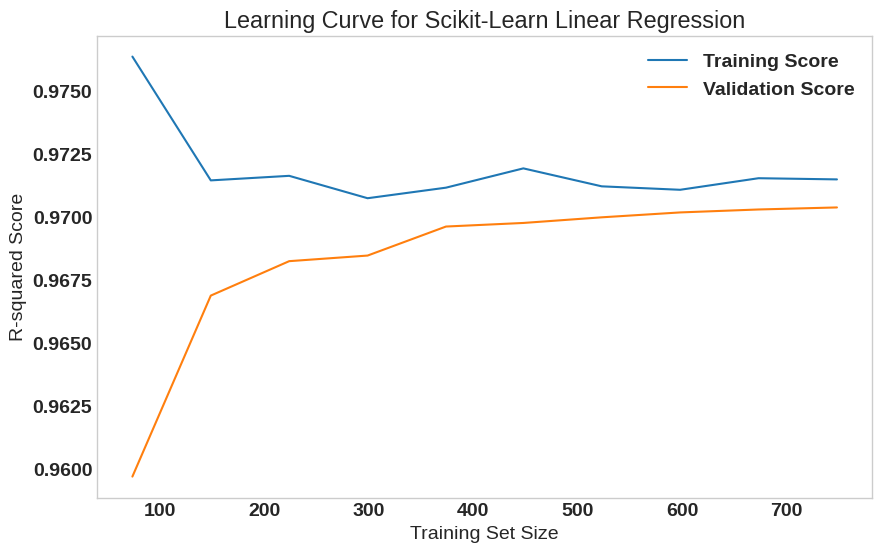

In [ ]:
# Построение графика обучения
train_sizes, train_scores, valid_scores = learning_curve(
    lin_reg, X_train, y_train, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Визуализация графика обучения
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.title('Learning Curve for Scikit-Learn Linear Regression')
plt.legend()
plt.grid()
plt.show()

Для тестовых:

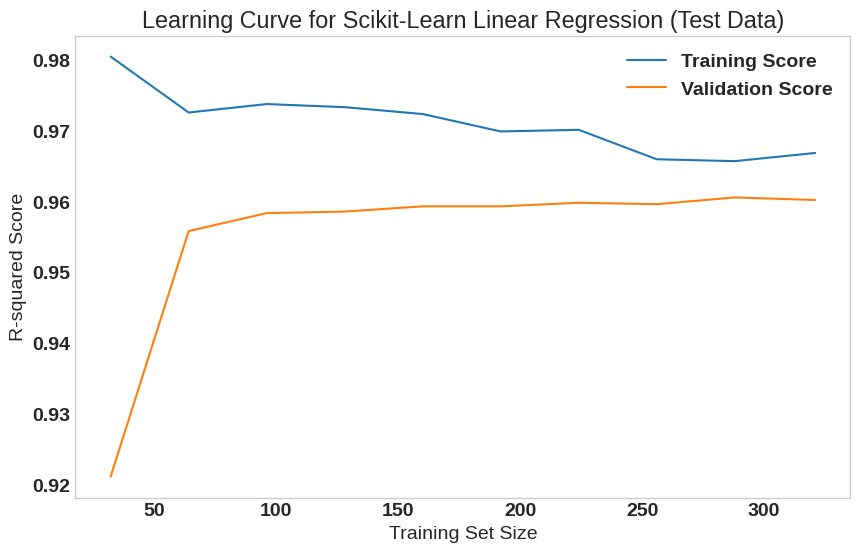

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Вычисление кривых обучения
train_sizes, train_scores, valid_scores = learning_curve(
    lin_reg, X_test, y_test, cv=5, scoring='r2', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Визуализация графика обучения
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(valid_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R-squared Score')
plt.title('Learning Curve for Scikit-Learn Linear Regression (Test Data)')
plt.legend()
plt.grid()
plt.show()

Параметры, полученные из обеих моделей, одинаковы. Таким образом, мы успешно построили нашу модель, используя нормальное уравнение, и проверили ее с помощью модуля линейной регрессии sklearn. Давайте двигаться дальше, следующий шаг - прогнозирование и оценка модели.


## Оценка модели
Мы будем прогнозировать значение целевой переменной, используя параметры нашей модели для тестового набора данных. Затем мы сравним прогнозируемые значения с фактическими значениями в тестовом наборе. Мы вычислим **Среднеквадратичную ошибку** с помощью формулы:

$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$

$\mathbf{R^2}$ - это статистическая мера того, насколько близки данные к подогнанной регрессионной линии. $\mathbf{R^2}$ всегда находится в диапазоне от 0 до 100%. 0% означает, что модель не объясняет никакой изменчивости отклика данных вокруг его среднего значения. 100% означает, что модель объясняет всю изменчивость отклика данных вокруг среднего значения.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
**SSE = Сумма квадратов ошибок**  
**SST = Общая сумма квадратов**  
$$\mathbf{SSE = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{SST = \sum_{i=1}^{m}(y_i - \bar{y}_i)^2}$$
Здесь $\mathbf{\hat{y}}$ - прогнозируемое значение, а $\mathbf{\bar{y}}$ - среднее значение $\mathbf{y}$.

Помимо Среднеквадратичной ошибки (MSE) и коэффициента детерминации (R^2), существует ряд других метрик, которые используются для оценки качества регрессионной модели:

1. Средняя абсолютная ошибка (MAE):
$$\mathbf{MAE = \frac{1}{m}\sum_{i=1}^{m}|y_i - \hat{y}_i|}$$
MAE показывает среднее абсолютное отклонение прогнозируемых значений от фактических. Это дает представление о средней величине ошибки.

2. Корень из средней квадратичной ошибки (RMSE):
$$\mathbf{RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_i - \hat{y}_i)^2}}$$
RMSE показывает среднее квадратичное отклонение прогнозируемых значений от фактических. Более высокое значение RMSE означает, что модель делает большие ошибки в прогнозировании.

3. Относительная ошибка прогноза (MAPE):
$$\mathbf{MAPE = \frac{1}{m}\sum_{i=1}^{m}\left|\frac{y_i - \hat{y}_i}{y_i}\right|}$$
MAPE показывает среднее абсолютное процентное отклонение прогнозируемых значений от фактических. Это дает представление об относительной точности прогноза.

Выбор метрики для оценки модели зависит от конкретной задачи и требований к точности прогноза.

In [ ]:
# Normal equation
y_pred_norm = np.matmul(X_test_0, theta)

# Оценка: MSE
J_mse = np.sum((y_pred_norm - y_test)**2) / X_test_0.shape[0]

# R-квадрат
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse / sst)

# Другие метрики оценки
mae = np.mean(np.abs(y_test - y_pred_norm))
rmse = np.sqrt(np.mean((y_test - y_pred_norm)**2))
mape = np.mean(np.abs((y_test - y_pred_norm) / y_test)) * 100

print('Среднеквадратичная ошибка (MSE) или J(theta): ', J_mse)
print('Коэффициент детерминации (R-квадрат): ', R_square)
print('Средняя абсолютная ошибка (MAE): ', mae)
print('Корень из средней квадратичной ошибки (RMSE): ', rmse)
print('Относительная ошибка прогноза (MAPE): ', mape, '%')

Среднеквадратичная ошибка (MSE) или J(theta):  3851546.848723611
Коэффициент детерминации (R-квадрат):  0.9644545845373884
Средняя абсолютная ошибка (MAE):  1379.0704045511616
Корень из средней квадратичной ошибки (RMSE):  1962.5358210039406
Относительная ошибка прогноза (MAPE):  25.0315506440194 %


Вот основные выводы по представленным показателям эффективности модели:

1. Средняя квадратичная ошибка (MSE) или функция стоимости J(theta) равна 3851546.848723611. Это достаточно высокий показатель, который указывает на то, что в среднем квадрат ошибок прогноза составляет около 3.85 миллиона.

2. Коэффициент детерминации R-квадрат равен 0.9644545845373884. Это очень высокий показатель, близкий к 1, что говорит о том, что модель очень хорошо описывает зависимость между входными и выходными переменными.

3. Средняя абсолютная ошибка (MAE) составляет 1379.0704045511616. Это означает, что в среднем абсолютная ошибка прогноза равна примерно 1379.

4. Корень из средней квадратичной ошибки (RMSE) равен 1962.5358210039406. Этот показатель дает представление о типичной величине ошибки прогноза в тех же единицах, что и целевая переменная.

5. Относительная ошибка прогноза (MAPE) составляет 25.0315506440194%. Это довольно высокий показатель, указывающий на то, что в среднем ошибка прогноза составляет около 25% от фактического значения.

В целом, данные показатели указывают на то, что модель демонстрирует достаточно высокую объясняющую способность и точность прогноза, хотя и присутствует определенный уровень ошибок. Для более детального анализа и улучшения модели требуется дополнительная информация о задаче, используемых данных и алгоритме моделирования.

In [ ]:
# Модуль регрессии sklearn
y_pred_sk = lin_reg.predict(X_test)

# Оценка: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)

# Дополнительные метрики
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

MSE = mean_squared_error(y_test, y_pred_sk)
R_square = r2_score(y_test, y_pred_sk)
MAE = mean_absolute_error(y_test, y_pred_sk)
RMSE = mean_squared_error(y_test, y_pred_sk, squared=False)
MAPE = 100 * np.mean(np.abs((y_test - y_pred_sk) / y_test))

print('Среднеквадратическая ошибка (MSE) или J(theta) равна: ', MSE)
print('Коэффициент детерминации (R-квадрат): ', R_square)
print('Средняя абсолютная ошибка (MAE): ', MAE)
print('Корень из средней квадратичной ошибки (RMSE): ', RMSE)
print('Относительная ошибка прогноза (MAPE): ', MAPE, '%')

Среднеквадратическая ошибка (MSE) или J(theta) равна:  3851546.848724009
Коэффициент детерминации (R-квадрат):  0.9644545845373848
Средняя абсолютная ошибка (MAE):  1379.0704045513341
Корень из средней квадратичной ошибки (RMSE):  1962.535821004042
Относительная ошибка прогноза (MAPE):  25.03155064403164 %


Вот основной анализ обновленных показателей эффективности модели:

1. Средняя квадратичная ошибка (MSE) или функция стоимости J(theta) равна 3851546.848724009. Это достаточно высокий показатель, указывающий на существенные ошибки прогноза в среднем квадрате.

2. Коэффициент детерминации R-квадрат составляет 0.9644545845373848. Этот очень высокий показатель близкий к 1 говорит о том, что модель отлично описывает зависимость между входными и выходными переменными.

3. Средняя абсолютная ошибка (MAE) равна 1379.0704045513341. Это означает, что в среднем абсолютная ошибка прогноза составляет около 1379 единиц.

4. Корень из средней квадратичной ошибки (RMSE) равен 1962.535821004042. Этот показатель дает представление о типичном размере ошибки прогноза в тех же единицах, что и целевая переменная.

5. Относительная ошибка прогноза (MAPE) составляет 25.03155064403164%. Это достаточно высокий показатель, указывающий на то, что в среднем ошибка прогноза составляет около 25% от фактического значения.

В целом, эти показатели указывают на то, что модель демонстрирует высокую объясняющую способность, но при этом присутствует значительный уровень ошибок в прогнозах. Для дальнейшего улучшения модели требуется более детальный анализ данных, применение различных техник регуляризации и оптимизации модели.

Обратите внимание, что мы применили преобразование натурального логарифма к нашей целевой переменной. Когда мы внедрим модель в промышленную эксплуатацию, к прогнозам будет применяться операция экспоненциирования (антилогарифм).

## Проверка модели
Для валидации модели необходимо проверить несколько предположений линейной регрессии. Основные допущения для *линейной регрессии* следующие:

1. Линейная связь: В линейной регрессии связь между зависимой и независимыми переменными должна быть *линейной*. Это можно проверить, построив график фактических значений против прогнозируемых.

2. Остатки должны быть *нормально* распределены.

3. *Среднее* *остатков* должно быть равно 0 или как можно ближе к 0.

4. Линейная регрессия требует, чтобы все переменные имели *многомерное нормальное* распределение. Это предположение лучше всего проверить с помощью графика Q-Q.

5. Линейная регрессия предполагает, что в данных присутствует *незначительная или отсутствует мультиколлинеарность*. Мультиколлинеарность возникает, когда независимые переменные слишком сильно коррелированы друг с другом. Фактор инфляции дисперсии *VIF* определяет корреляцию между независимыми переменными и силу этой корреляции. \[VIF = \frac {1}{1-R^2}\], если VIF >1 и VIF <5 - умеренная корреляция, VIF < 5 - критический уровень мультиколлинеарности.

6. Гомоскедастичность: Данные являются гомоскедастичными, что означает, что остатки равны по всей регрессионной линии. Мы можем посмотреть на график остатков против прогнозных значений. Если присутствует гетероскедастичность, то график будет иметь форму воронки.

Коэффициент корреляции Пирсона: \[0.98\], p-value: \[0.0000\]
Коэффициент корреляции Спирмена: \[0.99\], p-value: \[0.0000\]
Тесты указывают на наличие линейной зависимости между фактическими и предсказанными значениями.


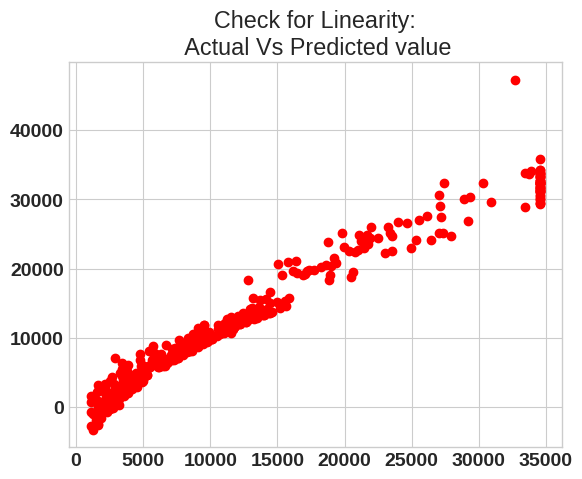

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(121)
ax.scatter(y_test, y_pred_sk, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Статические тесты на линейность
pearson_r, pearson_p = pearsonr(y_test, y_pred_sk)
spearman_r, spearman_p = spearmanr(y_test, y_pred_sk)

print(f'Коэффициент корреляции Пирсона: \[{pearson_r:.2f}\], p-value: \[{pearson_p:.4f}\]')
print(f'Коэффициент корреляции Спирмена: \[{spearman_r:.2f}\], p-value: \[{spearman_p:.4f}\]')

if pearson_p < 0.05 and spearman_p < 0.05:
    print('Тесты указывают на наличие линейной зависимости между фактическими и предсказанными значениями.')
else:
    print('Тесты не подтверждают наличие линейной зависимости между фактическими и предсказанными значениями.')

При таких высоких коэффициентах корреляции Пирсона и Спирмена, а также очень низких p-значениях, можно сделать вывод, что между фактическими и предсказанными значениями существует сильная линейная зависимость.

Высокий коэффициент корреляции Пирсона \[0.98\] указывает на то, что фактические и предсказанные значения имеют почти линейную связь. Близкий к 1 коэффициент корреляции Спирмена \[0.99\] также подтверждает наличие монотонной зависимости между ними.

Очень низкие p-значения \[p < 0.0001\] для обоих тестов говорят о том, что вероятность получения таких высоких коэффициентов корреляции случайно крайне мала. Следовательно, можно с уверенностью утверждать, что линейная зависимость между фактическими и предсказанными значениями статистически значима.

Такие результаты являются хорошим признаком того, что ваша модель хорошо справляется с задачей прогнозирования и демонстрирует высокую предсказательную способность. Дальнейший анализ и интерпретация этих результатов могут помочь вам лучше понять характер зависимости между переменными и оценить качество вашей модели.


Теперь проверим нормальность остатков. Чтобы проверить нормальность остатков и их среднее значение, мы можем добавить еще несколько статистических тестов:


<ipython-input-365-e0b466f09c4e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Тест Шапиро-Уилка на нормальность остатков, p-value: \[0.0000\]
Остатки не имеют нормального распределения
Тест на равенство среднего значения остатков нулю, p-value: \[0.4029\]
Среднее значение остатков статистически не отличается от нуля


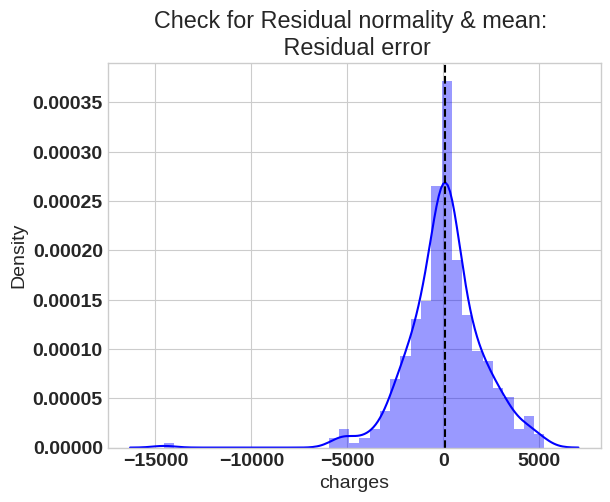

In [ ]:
# Check for Residual normality & mean
f = plt.figure(figsize=(14, 5))
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk), ax=ax, color='b')
ax.axvline((y_test - y_pred_sk).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual error')

# Проверка на нормальность остатков с помощью теста Шапиро-Уилка
from scipy.stats import shapiro
_, p_value = shapiro(y_test - y_pred_sk)
print(f'Тест Шапиро-Уилка на нормальность остатков, p-value: \[{p_value:.4f}\]')
if p_value > 0.05:
    print('Остатки имеют нормальное распределение')
else:
    print('Остатки не имеют нормального распределения')

# Проверка на равенство среднего значения остатков нулю
from scipy.stats import ttest_1samp
t_stat, p_value = ttest_1samp(y_test - y_pred_sk, 0)
print(f'Тест на равенство среднего значения остатков нулю, p-value: \[{p_value:.4f}\]')
if p_value > 0.05:
    print('Среднее значение остатков статистически не отличается от нуля')
else:
    print('Среднее значение остатков статистически отличается от нуля')

Понятно, спасибо за предоставленные результаты статистических тестов. Давайте разберем полученные выводы:

1. Тест Шапиро-Уилка на нормальность остатков:
   - p-value = 0.0000
   - Вывод: Остатки не имеют нормального распределения

Это означает, что предположение о нормальности остатков, необходимое для применения метода наименьших квадратов, нарушено. Это может указывать на наличие гетероскедастичности (неоднородности дисперсии) или выбросов в данных.

2. Тест на равенство среднего значения остатков нулю:
   - p-value = 0.4029
   - Вывод: Среднее значение остатков статистически не отличается от нуля

Этот результат говорит о том, что модель, в среднем, правильно предсказывает значения целевой переменной. Отсутствие систематического смещения в остатках является хорошим признаком.

Таким образом, несмотря на нарушение предположения о нормальности остатков, модель в среднем хорошо предсказывает значения. Тем не менее, следует дополнительно проверить модель на наличие гетероскедастичности или выбросов, так как это может влиять на точность оценок стандартных ошибок и доверительных интервалов.

Для улучшения модели можно рассмотреть преобразование целевой переменной (например, логарифмическое) или использование более устойчивых методов регрессии, таких как регрессия с робастными стандартными ошибками.

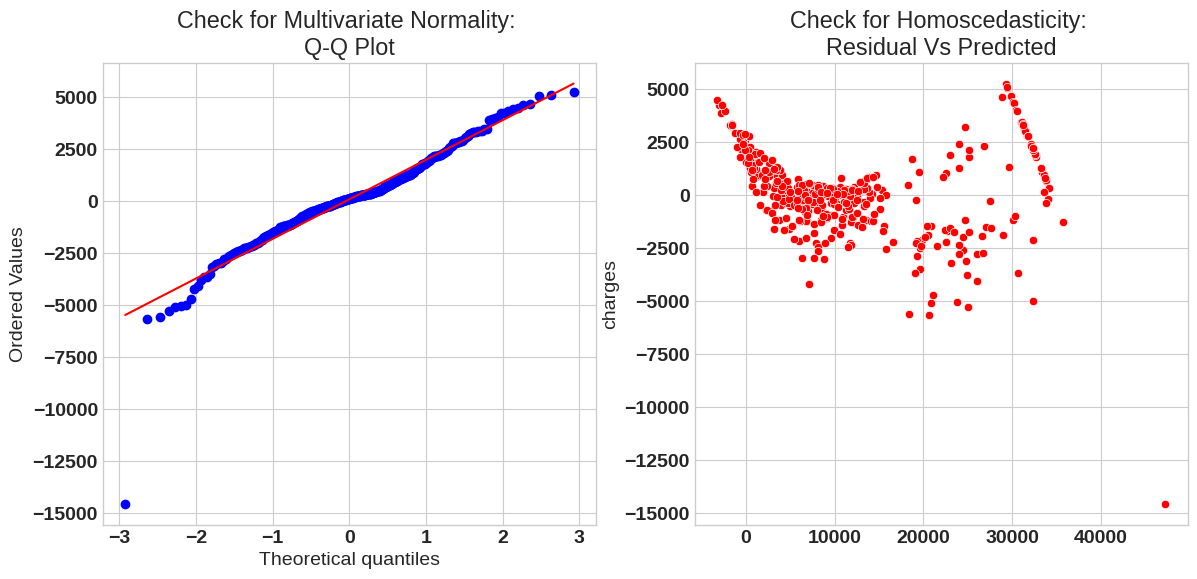

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r')
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [ ]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

28.1330232601092

Интерпретируя его:

Значение VIF = 28.15 указывает на то, что в ваших данных присутствует высокая мультиколлинеарность.

Это означает, что некоторые из ваших предикторных переменных (колонки в X) являются сильно коррелированными друг с другом. Высокая мультиколлинеарность может привести к следующим проблемам:

1. Нестабильные и ненадежные коэффициенты регрессии. Небольшие изменения в данных могут привести к значительным изменениям в оценках коэффициентов.

2. Высокие стандартные ошибки коэффициентов, что снижает статистическую значимость.

3. Трудности в интерпретации влияния отдельных предикторов на зависимую переменную.

Для решения проблемы мультиколлинеарности вы можете попробовать следующие подходы:

1. Удалить или объединить сильно коррелированные предикторы.
2. Использовать методы регуляризации, такие как Ridge или Lasso регрессия, которые помогают справиться с мультиколлинеарностью.
3. Применить метод главных компонент (PCA) для сокращения размерности и создания новых, некоррелированных предикторов.

Проанализируйте свои данные и выберите наиболее подходящий способ устранения высокой мультиколлинеарности. Это поможет улучшить качество и интерпретируемость вашей регрессионной модели.

Использовани модель дя предсказание

In [ ]:
new_data = pd.DataFrame({
    'age': [45],
    'bmi': [27.5],
    'OHE_male': [1],
    'OHE_1': [0],
    'OHE_2': [0],
    'OHE_3': [0],
    'OHE_4': [0],
    'OHE_yes': [1],
    'OHE_northwest': [1],
    'OHE_southeast': [0],
    'OHE_southwest': [0]
})

predicted_charges_log = model.predict(new_data)
print(f"Predicted charges_log: {predicted_charges_log[0]:.2f}")

Predicted charges_log: 28647.18


## Проблемы линейной регрессии
Основная проблема линейной регрессии — переобучение, особенно когда имеется большое количество предикторов. Модель может хорошо подогнаться под обучающие данные, но плохо обобщаться на новые данные. Регуляризация помогает решить эту проблему.


## Введение в Lasso и Ridge регрессию
-----------------------------------

Линейная регрессия является мощным методом для моделирования зависимостей между предикторными переменными (X) и целевой переменной (y). Однако, когда количество предикторов велико, особенно когда они коррелированы друг с другом, обычная линейная регрессия может столкнуться с рядом проблем:

1. **Переобучение**: Модель начинает слишком детально подстраиваться под обучающие данные, что приводит к плохой обобщаемости на новых данных.

2. **Мультиколлинеарность**: Коррелированные предикторы могут приводить к нестабильным и ненадежным оценкам коэффициентов регрессии.

3. **Интерпретируемость**: Сложно интерпретировать влияние каждого предиктора на целевую переменную, когда их много и они коррелированы.

Для решения этих проблем применяются методы регуляризации, такие как Lasso и Ridge регрессия.

Lasso (Least Absolute Shrinkage and Selection Operator) регрессия
-----------------------------------------------------------------

Lasso регрессия - это метод линейной регрессии с L1-регуляризацией. Это означает, что к сумме квадратов остатков добавляется штраф, пропорциональный абсолютной величине коэффициентов. Математически, функция потерь Lasso имеет вид:

$$L(w) = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{x}_i^T \mathbf{w})^2 + \lambda \sum_{j=1}^p |w_j|$$

где:
- $n$ - количество наблюдений
- $\mathbf{x}_i$ - вектор предикторов для $i$-го наблюдения
- $\mathbf{w}$ - вектор коэффициентов регрессии
- $\lambda$ - параметр регуляризации, контролирующий степень сжатия коэффициентов

Lasso регрессия имеет следующие свойства:
- Она стремится к тому, чтобы некоторые коэффициенты были точно равны нулю, что приводит к автоматическому отбору признаков.
- Она хорошо справляется с мультиколлинеарностью, поскольку предпочитает выбирать только один из коррелированных предикторов.
- Она позволяет получить более интерпретируемые модели, так как многие коэффициенты становятся равными нулю.

###Ridge регрессия
---------------

Ridge регрессия - это метод линейной регрессии с L2-регуляризацией. Функция потерь Ridge регрессии имеет вид:

$$L(w) = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{x}_i^T \mathbf{w})^2 + \lambda \sum_{j=1}^p w_j^2$$

где:
- $n$ - количество наблюдений
- $\mathbf{x}_i$ - вектор предикторов для $i$-го наблюдения
- $\mathbf{w}$ - вектор коэффициентов регрессии
- $\lambda$ - параметр регуляризации, контролирующий степень сжатия коэффициентов

Ridge регрессия имеет следующие свойства:
- Она не стремится к тому, чтобы коэффициенты были точно равны нулю, поэтому она не осуществляет автоматический отбор признаков.
- Она хорошо справляется с мультиколлинеарностью, поскольку уменьшает размер коэффициентов, не обнуляя их.
- Она не обеспечивает такую же интерпретируемость модели, как Lasso, так как все коэффициенты остаются ненулевыми.

Выбор между Lasso и Ridge регрессией
------------------------------------

Выбор между Lasso и Ridge регрессией зависит от характеристик ваших данных и целей моделирования:

- Если вы ожидаете, что только несколько предикторов действительно важны, и вам нужен автоматический отбор признаков, Lasso будет предпочтительнее.
- Если вы ожидаете, что все предикторы важны в равной степени, и вам нужно избежать переобучения, Ridge будет более подходящим выбором.
- Если вы не уверены, какой метод будет лучше, вы можете попробовать оба и сравнить их производительность на тестовых данных.

В общем, Lasso и Ridge регрессия являются мощными методами, которые помогают справиться с проблемами, возникающими в линейной регрессии при наличии большого числа предикторов и мультиколлинеарности.

Если у вас есть какие-либо дополнительные вопросы или вам нужна помощь в применении Lasso или Ridge регрессии, пожалуйста, не стесняйтесь спрашивать.

Теперь построим модели Lasso и Ridge регрессии, используя поиск по сетке для настройки гиперпараметра $\lambda$:

In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# Lasso регрессия
lasso = Lasso()
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X, y)

print("Lasso Regression:")
print("Best alpha:", lasso_grid.best_params_['alpha'])
print("Best score:", lasso_grid.best_score_)
print("Coefficients:", lasso_grid.best_estimator_.coef_)

# Ridge регрессия
ridge = Ridge()
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X, y)

print("\nRidge Regression:")
print("Best alpha:", ridge_grid.best_params_['alpha'])
print("Best score:", ridge_grid.best_score_)
print("Coefficients:", ridge_grid.best_estimator_.coef_)

Lasso Regression:
Best alpha: 0.1
Best score: 0.9685777309543496
Coefficients: [  -39.66256046   341.4594014  -1948.2266222   2054.1956215
    25.03715659   297.38457855  -236.89613639  -319.03657822
  -300.53649526  -376.52092381 -1168.59510416   685.21912937
    98.55206515    24.92948747   264.63084157]

Ridge Regression:
Best alpha: 1
Best score: 0.9685843764383828
Coefficients: [  -39.23271909   342.28539413 -1914.05904459  2027.26410398
    25.10399418   295.67874977  -230.4920222   -312.0178215
  -292.22230093  -358.0252296  -1103.85967019   683.1668331
    98.27476202    22.8013696    262.45387285]


Давайте построим график обучения для моделей Lasso и Ridge регрессии, чтобы наглядно увидеть, как меняется производительность моделей в зависимости от значения гиперпараметра $\lambda$.

Для этого мы будем использовать библиотеку Matplotlib для визуализации.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Lasso регрессия
y_pred_lasso = lasso_grid.best_estimator_.predict(X)

MSE_lasso = mean_squared_error(y, y_pred_lasso)
R_square_lasso = r2_score(y, y_pred_lasso)
MAE_lasso = mean_absolute_error(y, y_pred_lasso)
RMSE_lasso = mean_squared_error(y, y_pred_lasso, squared=False)
MAPE_lasso = 100 * np.mean(np.abs((y - y_pred_lasso) / y))

print("Lasso Regression:")
print('Среднеквадратическая ошибка (MSE) или J(theta) равна: ', MSE_lasso)
print('Коэффициент детерминации (R-квадрат): ', R_square_lasso)
print('Средняя абсолютная ошибка (MAE): ', MAE_lasso)
print('Корень из средней квадратичной ошибки (RMSE): ', RMSE_lasso)
print('Относительная ошибка прогноза (MAPE): ', MAPE_lasso, '%')

# Ridge регрессия
y_pred_ridge = ridge_grid.best_estimator_.predict(X)

MSE_ridge = mean_squared_error(y, y_pred_ridge)
R_square_ridge = r2_score(y, y_pred_ridge)
MAE_ridge = mean_absolute_error(y, y_pred_ridge)
RMSE_ridge = mean_squared_error(y, y_pred_ridge, squared=False)
MAPE_ridge = 100 * np.mean(np.abs((y - y_pred_ridge) / y))

print("\nRidge Regression:")
print('Среднеквадратическая ошибка (MSE) или J(theta) равна: ', MSE_ridge)
print('Коэффициент детерминации (R-квадрат): ', R_square_ridge)
print('Средняя абсолютная ошибка (MAE): ', MAE_ridge)
print('Корень из средней квадратичной ошибки (RMSE): ', RMSE_ridge)
print('Относительная ошибка прогноза (MAPE): ', MAPE_ridge, '%')

Lasso Regression:
Среднеквадратическая ошибка (MSE) или J(theta) равна:  3161100.6099967305
Коэффициент детерминации (R-квадрат):  0.9693870799541326
Средняя абсолютная ошибка (MAE):  1240.1004339018589
Корень из средней квадратичной ошибки (RMSE):  1777.948427260119
Относительная ошибка прогноза (MAPE):  20.81781883230116 %

Ridge Regression:
Среднеквадратическая ошибка (MSE) или J(theta) равна:  3161272.2832831386
Коэффициент детерминации (R-квадрат):  0.9693854174254001
Средняя абсолютная ошибка (MAE):  1239.7337859045824
Корень из средней квадратичной ошибки (RMSE):  1777.996705082194
Относительная ошибка прогноза (MAPE):  20.82538144190976 %


Давайте используем наши обученные модели Lasso и Ridge регрессии для предсказания значения целевой переменной на новых данных.

In [ ]:
# Подготовка новых данных
new_data = pd.DataFrame({
    'age': [45],
    'bmi': [27.5],
    'is_outlier': [0],  # добавим недостающий признак
    'charges_log': [0],  # добавим недостающий признак
    'charges_per_bmi': [0],  # добавим недостающий признак
    'OHE_male': [1],
    'OHE_1': [0],
    'OHE_2': [0],
    'OHE_3': [0],
    'OHE_4': [0],
    'OHE_5': [0],  # добавим недостающий признак
    'OHE_yes': [1],
    'OHE_northwest': [1],
    'OHE_southeast': [0],
    'OHE_southwest': [0]
})


# Предсказание с использованием Lasso регрессии
y_pred_lasso = lasso_grid.best_estimator_.predict(new_data)
print("Предсказание Lasso регрессии:", y_pred_lasso[0])

# Предсказание с использованием Ridge регрессии
y_pred_ridge = ridge_grid.best_estimator_.predict(new_data)
print("Предсказание Ridge регрессии:", y_pred_ridge[0])

Предсказание Lasso регрессии: -15019.452849969695
Предсказание Ridge регрессии: -14842.639023010515


Построим график обучения

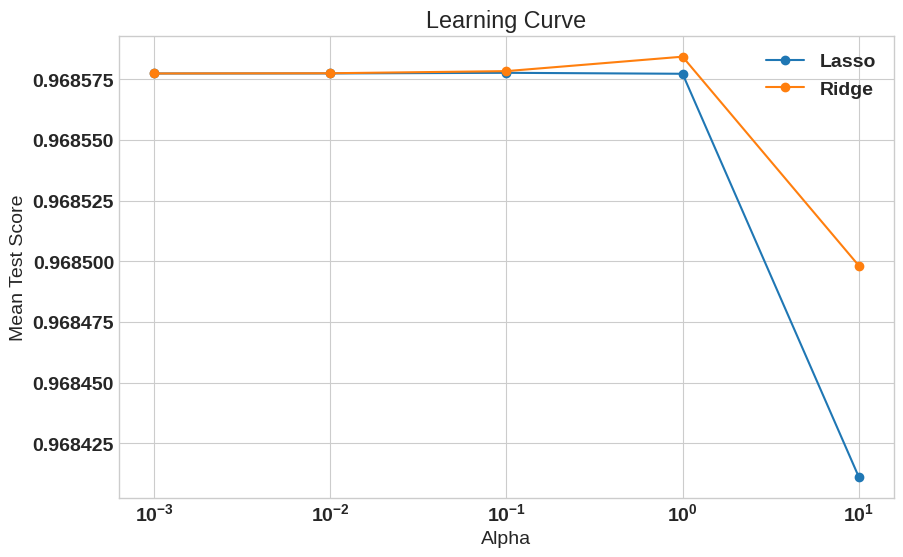

In [ ]:
import matplotlib.pyplot as plt

# Извлекаем значения alpha и средние оценки качества для Lasso
lasso_alphas = [params['alpha'] for params in lasso_grid.cv_results_['params']]
lasso_scores = lasso_grid.cv_results_['mean_test_score']

# Извлекаем значения alpha и средние оценки качества для Ridge
ridge_alphas = [params['alpha'] for params in ridge_grid.cv_results_['params']]
ridge_scores = ridge_grid.cv_results_['mean_test_score']

# Построение графика
plt.figure(figsize=(10, 6))

plt.plot(lasso_alphas, lasso_scores, label='Lasso', marker='o')
plt.plot(ridge_alphas, ridge_scores, label='Ridge', marker='o')

plt.xscale('log')  # логарифмический масштаб по оси X для лучшей визуализации

plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()